<a href="https://colab.research.google.com/github/niveditac-98/kdd-group-5/blob/main/KDD_Project_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis of the impact of COVID-19 on the Stock Market across different sectors and post-pandemic prediction of the same.

###Team :
*   Nivedita Chinnakannu (801200447)
*   Sayali Ambulkar (801200407)
*   Ishani Naik (801223537)
*   Meghana Palaparthi (801203546)





###Data and Source Description:

In our project, we have used COVID-19, S&P 500 Stock Market, and Vaccination datasets. The data of the Health Care, IT, and Industrial sectors were included and merged with the COVID-19 dataset on the date column. <br>
COVID-19 dataset has the features confirmed cases, deaths, and recoveries for each day. Stock market data has the features High, Low, Close, and Adjusted Close prices for each day.<br>
We used the data available at the following links:

<a>https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset</a><br>
<a>https://www.kaggle.com/paultimothymooney/stock-market-data</a><br>
<a>https://www.kaggle.com/gpreda/covid-19-vaccination-progress/data</a><br>


###Business Understanding
<p>The outbreak of the COVID-19 pandemic triggered a freefall in share prices. In the year since, the world has changed, transforming our lives, our economies, and the fortunes of our businesses—an unfolding journey that is reflected in the ups and downs of share prices. The fundamental trends have accelerated, propelling some companies forward at record speed while for others headwinds have turned into hurricanes.</p>
<p>We deemed it would be of great use to individuals and businesses to know how variations in confirmed cases, death and recoveries due to COVID-19 effects stock prices. In our project, we are trying to predict the stock prices of companies in three different sectors namely, health care, IT and industrials based on COVID-19 cases.</p>


###Data Preparation:

We have used the updated datasets from the above-mentioned links.<br>We performed the above steps using both Python and DataRobot.<br>
*   We initially merged COVID-19 and Stock Market datasets for each sector separately.
*   We used the vaccination dataset independently, without merging with the aforementioned datasets.
*   We performed data cleaning by dropping duplicate values, dropping rows with null values, dropping unnecessary/irrelevant columns, changing the column datatypes, changing date formats.
*   We then checked if there are any anomalies in the data that needed to be handled.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive_path = "/content/drive/My Drive/KDD group Project/"

####Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import gridspec
import os
%matplotlib inline

####Reading various companies data

In [ ]:
# S&P500 Healthcare Companies
a = pd.read_csv(drive_path + "A.csv")
abc = pd.read_csv(drive_path + "ABC.csv")
abbv = pd.read_csv(drive_path + "ABBV.csv")
abt = pd.read_csv(drive_path + "ABT.csv")
abmd = pd.read_csv(drive_path + "ABMD.csv")

# S&P500 Information Technology Companies
aapl = pd.read_csv(drive_path + "AAPL.csv")
acn = pd.read_csv(drive_path + "ACN.csv")
adi = pd.read_csv(drive_path + "ADI.csv")
adp = pd.read_csv(drive_path + "ADP.csv")
adsk = pd.read_csv(drive_path + "ADSK.csv")

# S&P500 Industrials Companies
aal = pd.read_csv(drive_path + "AAL.csv")
alk = pd.read_csv(drive_path + "ALK.csv")
alle = pd.read_csv(drive_path + "ALLE.csv")
ame = pd.read_csv(drive_path + "AME.csv")
aos = pd.read_csv(drive_path + "AOS.csv")

covid = pd.read_csv(drive_path + "covid_19_data.csv")

In [ ]:
covid.head()

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01-22-2020          Anhui  ...         1      0          0
1    2      01-22-2020        Beijing  ...        14      0          0
2    3      01-22-2020      Chongqing  ...         6      0          0
3    4      01-22-2020         Fujian  ...         1      0          0
4    5      01-22-2020          Gansu  ...         0      0          0

[5 rows x 8 columns]

In [ ]:
a.head()

Date        Low       Open  ...       High      Close  Adjusted Close
0  18-11-1999  28.612303  32.546494  ...  35.765381  31.473534       27.102232
1  19-11-1999  28.478184  30.713518  ...  30.758226  28.880545       24.869375
2  22-11-1999  28.657009  29.551144  ...  31.473534  31.473534       27.102232
3  23-11-1999  28.612303  30.400572  ...  31.205294  28.612303       24.638391
4  24-11-1999  28.612303  28.701717  ...  29.998213  29.372318       25.292847

[5 rows x 7 columns]

In [ ]:
# S&P Healthcare Companies
a.insert(1, "Code",'A')
abc.insert(1, 'Code','ABC')
abbv.insert(1, "Code",'ABBV')
abt.insert(1, "Code",'ABT')
abmd.insert(1, "Code",'ABMD')

In [ ]:
# S&P Information Technology Companies
aapl.insert(1, "Code",'AAPL')
acn.insert(1, 'Code','ACN')
adi.insert(1, "Code",'ADI')
adp.insert(1, "Code",'ADP')
adsk.insert(1, "Code",'ADSK')

In [ ]:
# S&P Industrials Companies
aal.insert(1, "Code",'AAL')
alk.insert(1, 'Code','ALK')
alle.insert(1, "Code",'ALLE')
ame.insert(1, "Code",'AME')
aos.insert(1, "Code",'AOS')

In [ ]:
list_stock_data = [a, abc, abbv, abt, abmd]
list_stock_data_IT = [aapl, acn, adi, adp, adsk]
list_stock_data_Industrials = [aal, alk, alle, ame, aos]

In [ ]:
list_stock_data

[            Date Code         Low  ...        High       Close  Adjusted Close
 0     18-11-1999    A   28.612303  ...   35.765381   31.473534       27.102232
 1     19-11-1999    A   28.478184  ...   30.758226   28.880545       24.869375
 2     22-11-1999    A   28.657009  ...   31.473534   31.473534       27.102232
 3     23-11-1999    A   28.612303  ...   31.205294   28.612303       24.638391
 4     24-11-1999    A   28.612303  ...   29.998213   29.372318       25.292847
 ...          ...  ...         ...  ...         ...         ...             ...
 5543  30-11-2021    A  149.699997  ...  155.710007  150.899994      150.899994
 5544  01-12-2021    A  148.089996  ...  152.850006  148.210007      148.210007
 5545  02-12-2021    A  147.729996  ...  152.470001  150.990005      150.990005
 5546  03-12-2021    A  147.720001  ...  153.000000  149.330002      149.330002
 5547  06-12-2021    A  147.889999  ...  150.130005  148.729996      148.729996
 
 [5548 rows x 8 columns],
            

In [ ]:
stock_data = pd.concat(list_stock_data)
stock_data_IT = pd.concat(list_stock_data_IT)
stock_data_Industrials = pd.concat(list_stock_data_Industrials)

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
Precovid_stock_data = stock_data.loc[stock_data.Date >= '01-01-2015'].copy()

Precovid_stock_data

Date  Code         Low  ...        High       Close  Adjusted Close
3803 2015-02-01     A   40.369999  ...   41.310001   40.560001       38.184975
3804 2015-05-01     A   39.700001  ...   40.459999   39.799999       37.469482
3805 2015-06-01     A   39.020000  ...   40.020000   39.180000       36.885777
3806 2015-07-01     A   39.290001  ...   39.810001   39.700001       37.375332
3807 2015-08-01     A   40.180000  ...   40.980000   40.889999       38.495640
...         ...   ...         ...  ...         ...         ...             ...
8655 2021-11-30  ABMD  312.429993  ...  321.410004  314.779999      314.779999
8656 2021-01-12  ABMD  305.709991  ...  325.230011  305.709991      305.709991
8657 2021-02-12  ABMD  304.570007  ...  314.980011  312.440002      312.440002
8658 2021-03-12  ABMD  295.709991  ...  316.619995  300.630005      300.630005
8659 2021-06-12  ABMD  297.220001  ...  305.569885  302.105011      302.105011

[8724 rows x 8 columns]

###Domain Understanding
<a>https://towardsdatascience.com/covid-19-rampage-on-the-stock-market-machine-learning-comes-to-explain-3332707954af</a> - This addresses the study of companies that lost most of their stock price during COVID-19. This article explains the use of Decision Tress to predict the stock market.<br>
<a>https://arxiv.org/abs/2105.02785</a> - This paper discusses the forecast performance of four models including Long-Short Term Memory, XGBoost, Autoregression, and Last Value on stock prices.<br>
<a>https://en.wikipedia.org/wiki/Linear_regression</a> - This site explains the working of Multiple Linear Regression and it’s uses.


###Data Visualization and Analysis

In [ ]:
mean_df_A =Precovid_stock_data[Precovid_stock_data["Code"] == "A"]
mean_df_A  = mean_df_A .groupby(['Date']).mean()
mean_df_ABC =Precovid_stock_data[Precovid_stock_data["Code"] == "ABC"]
mean_df_ABC  = mean_df_ABC.groupby(['Date']).mean()
mean_df_ABBV =Precovid_stock_data[Precovid_stock_data["Code"] == "ABBV"]
mean_df_ABBV  = mean_df_ABBV .groupby(['Date']).mean()
mean_df_ABT =Precovid_stock_data[Precovid_stock_data["Code"] == "ABT"]
mean_df_ABT  = mean_df_ABT .groupby(['Date']).mean()
mean_df_ABMD =Precovid_stock_data[Precovid_stock_data["Code"] == "ABMD"]
mean_df_ABMD  = mean_df_ABMD .groupby(['Date']).mean()


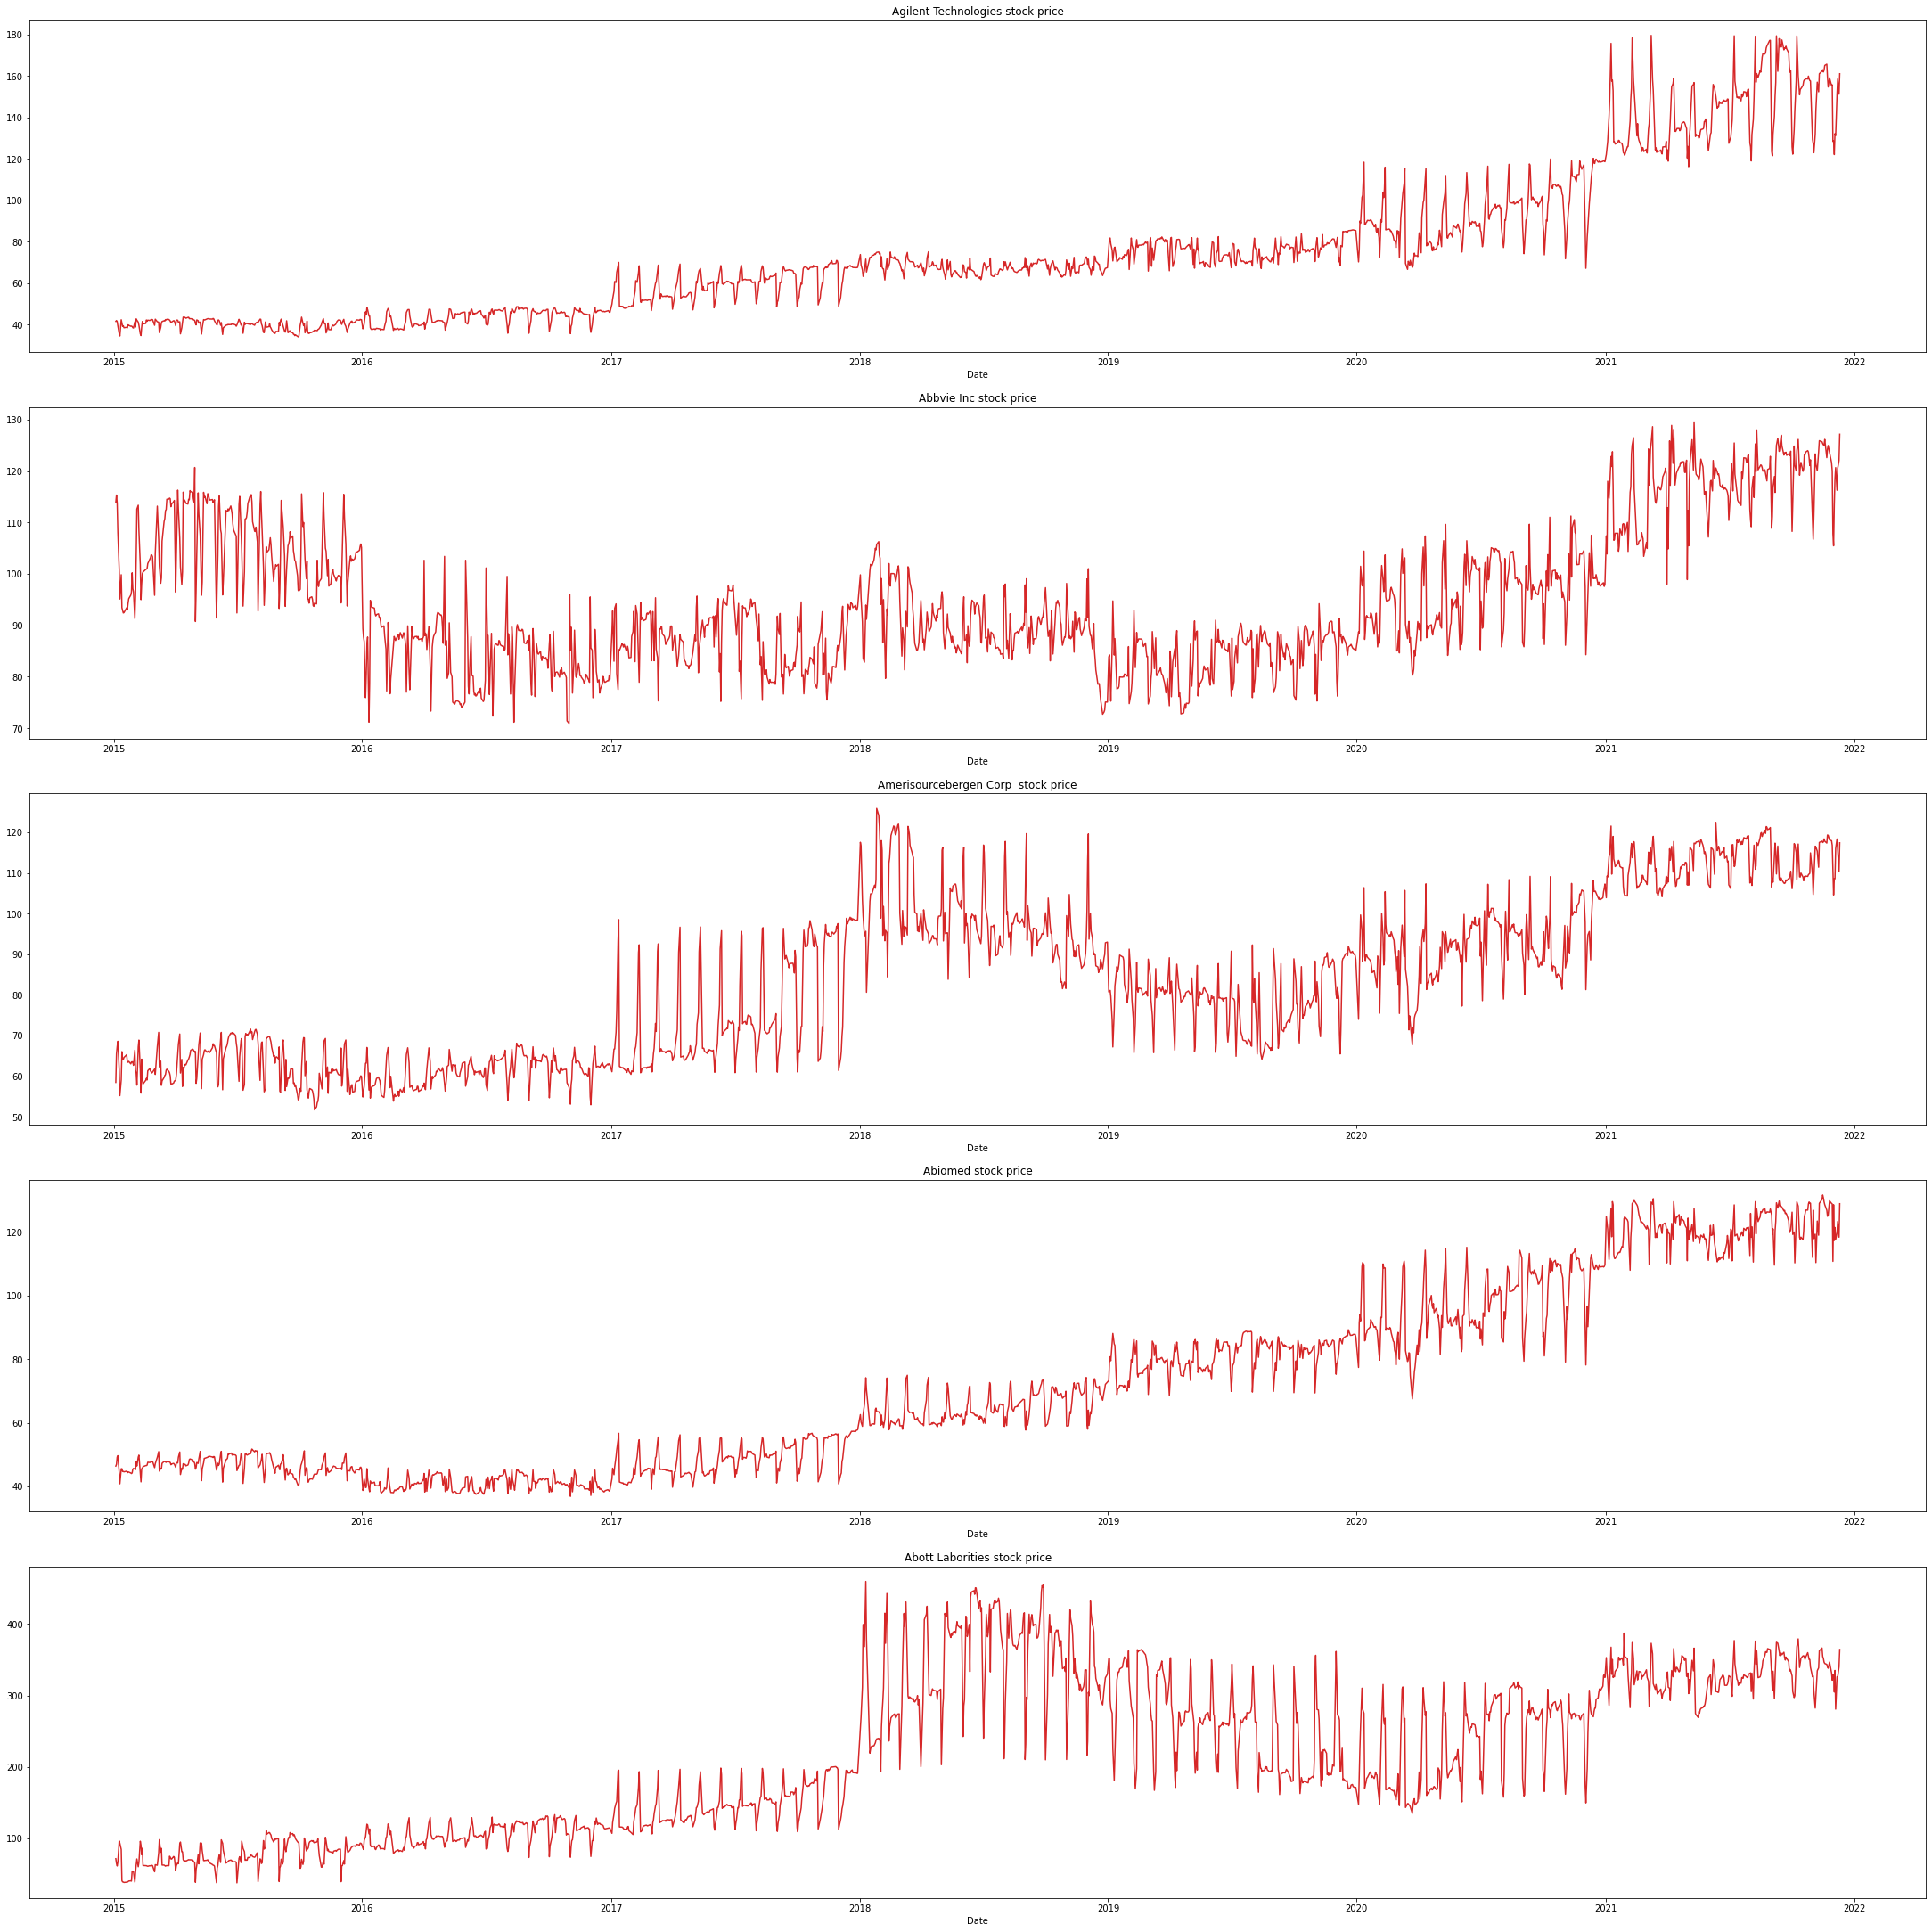

In [ ]:
#Comparison of the trends of confirmed COVID-19 cases and the stock price of the company under observation
fig, axs = plt.subplots(nrows= 5,constrained_layout=True,figsize=(30,30))

axs[0].plot(mean_df_A.index, mean_df_A['High'], 'tab:red')
axs[0].set_title('Agilent Technologies stock price')
axs[1].plot(mean_df_ABC.index, mean_df_ABC['High'], 'tab:red')
axs[1].set_title('Abbvie Inc stock price')
axs[2].plot(mean_df_ABBV.index, mean_df_ABBV['High'], 'tab:red')
axs[2].set_title('Amerisourcebergen Corp  stock price')
axs[3].plot(mean_df_ABT.index, mean_df_ABT['High'], 'tab:red')
axs[3].set_title('Abiomed stock price')
axs[4].plot(mean_df_ABMD.index, mean_df_ABMD['High'], 'tab:red')
axs[4].set_title('Abott Laborities stock price')
for ax in axs.flat:
    ax.set(xlabel='Date')


In [ ]:
stock_data_IT['Date'] = pd.to_datetime(stock_data_IT['Date'])
Precovid_stock_data_IT = stock_data_IT.loc[stock_data_IT.Date >= '01-01-2015'].copy()

Precovid_stock_data_IT

Date  Code         Low  ...        High       Close  Adjusted Close
8589 2015-02-01  AAPL   26.837500  ...   27.860001   27.332500       24.746000
8590 2015-05-01  AAPL   26.352501  ...   27.162500   26.562500       24.048857
8591 2015-06-01  AAPL   26.157499  ...   26.857500   26.565001       24.051126
8592 2015-07-01  AAPL   26.674999  ...   27.049999   26.937500       24.388382
8593 2015-08-01  AAPL   27.174999  ...   28.037500   27.972500       25.325430
...         ...   ...         ...  ...         ...         ...             ...
9180 2021-11-30  ADSK  252.490005  ...  263.000000  254.190002      254.190002
9181 2021-01-12  ADSK  249.410004  ...  265.320007  249.679993      249.679993
9182 2021-02-12  ADSK  250.809998  ...  258.540009  257.660004      257.660004
9183 2021-03-12  ADSK  253.050003  ...  263.489990  259.019989      259.019989
9184 2021-06-12  ADSK  254.339996  ...  262.725006  261.325012      261.325012

[8725 rows x 8 columns]

In [ ]:
mean_df_AAPL =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "AAPL"]
mean_df_AAPL  = mean_df_AAPL .groupby(['Date']).mean()
mean_df_ACN =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ACN"]
mean_df_ACN  = mean_df_ACN.groupby(['Date']).mean()
mean_df_ADI =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ADI"]
mean_df_ADI  = mean_df_ADI .groupby(['Date']).mean()
mean_df_ADP =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ADP"]
mean_df_ADP  = mean_df_ADP .groupby(['Date']).mean()
mean_df_ADSK =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ADSK"]
mean_df_ADSK  = mean_df_ADSK .groupby(['Date']).mean()

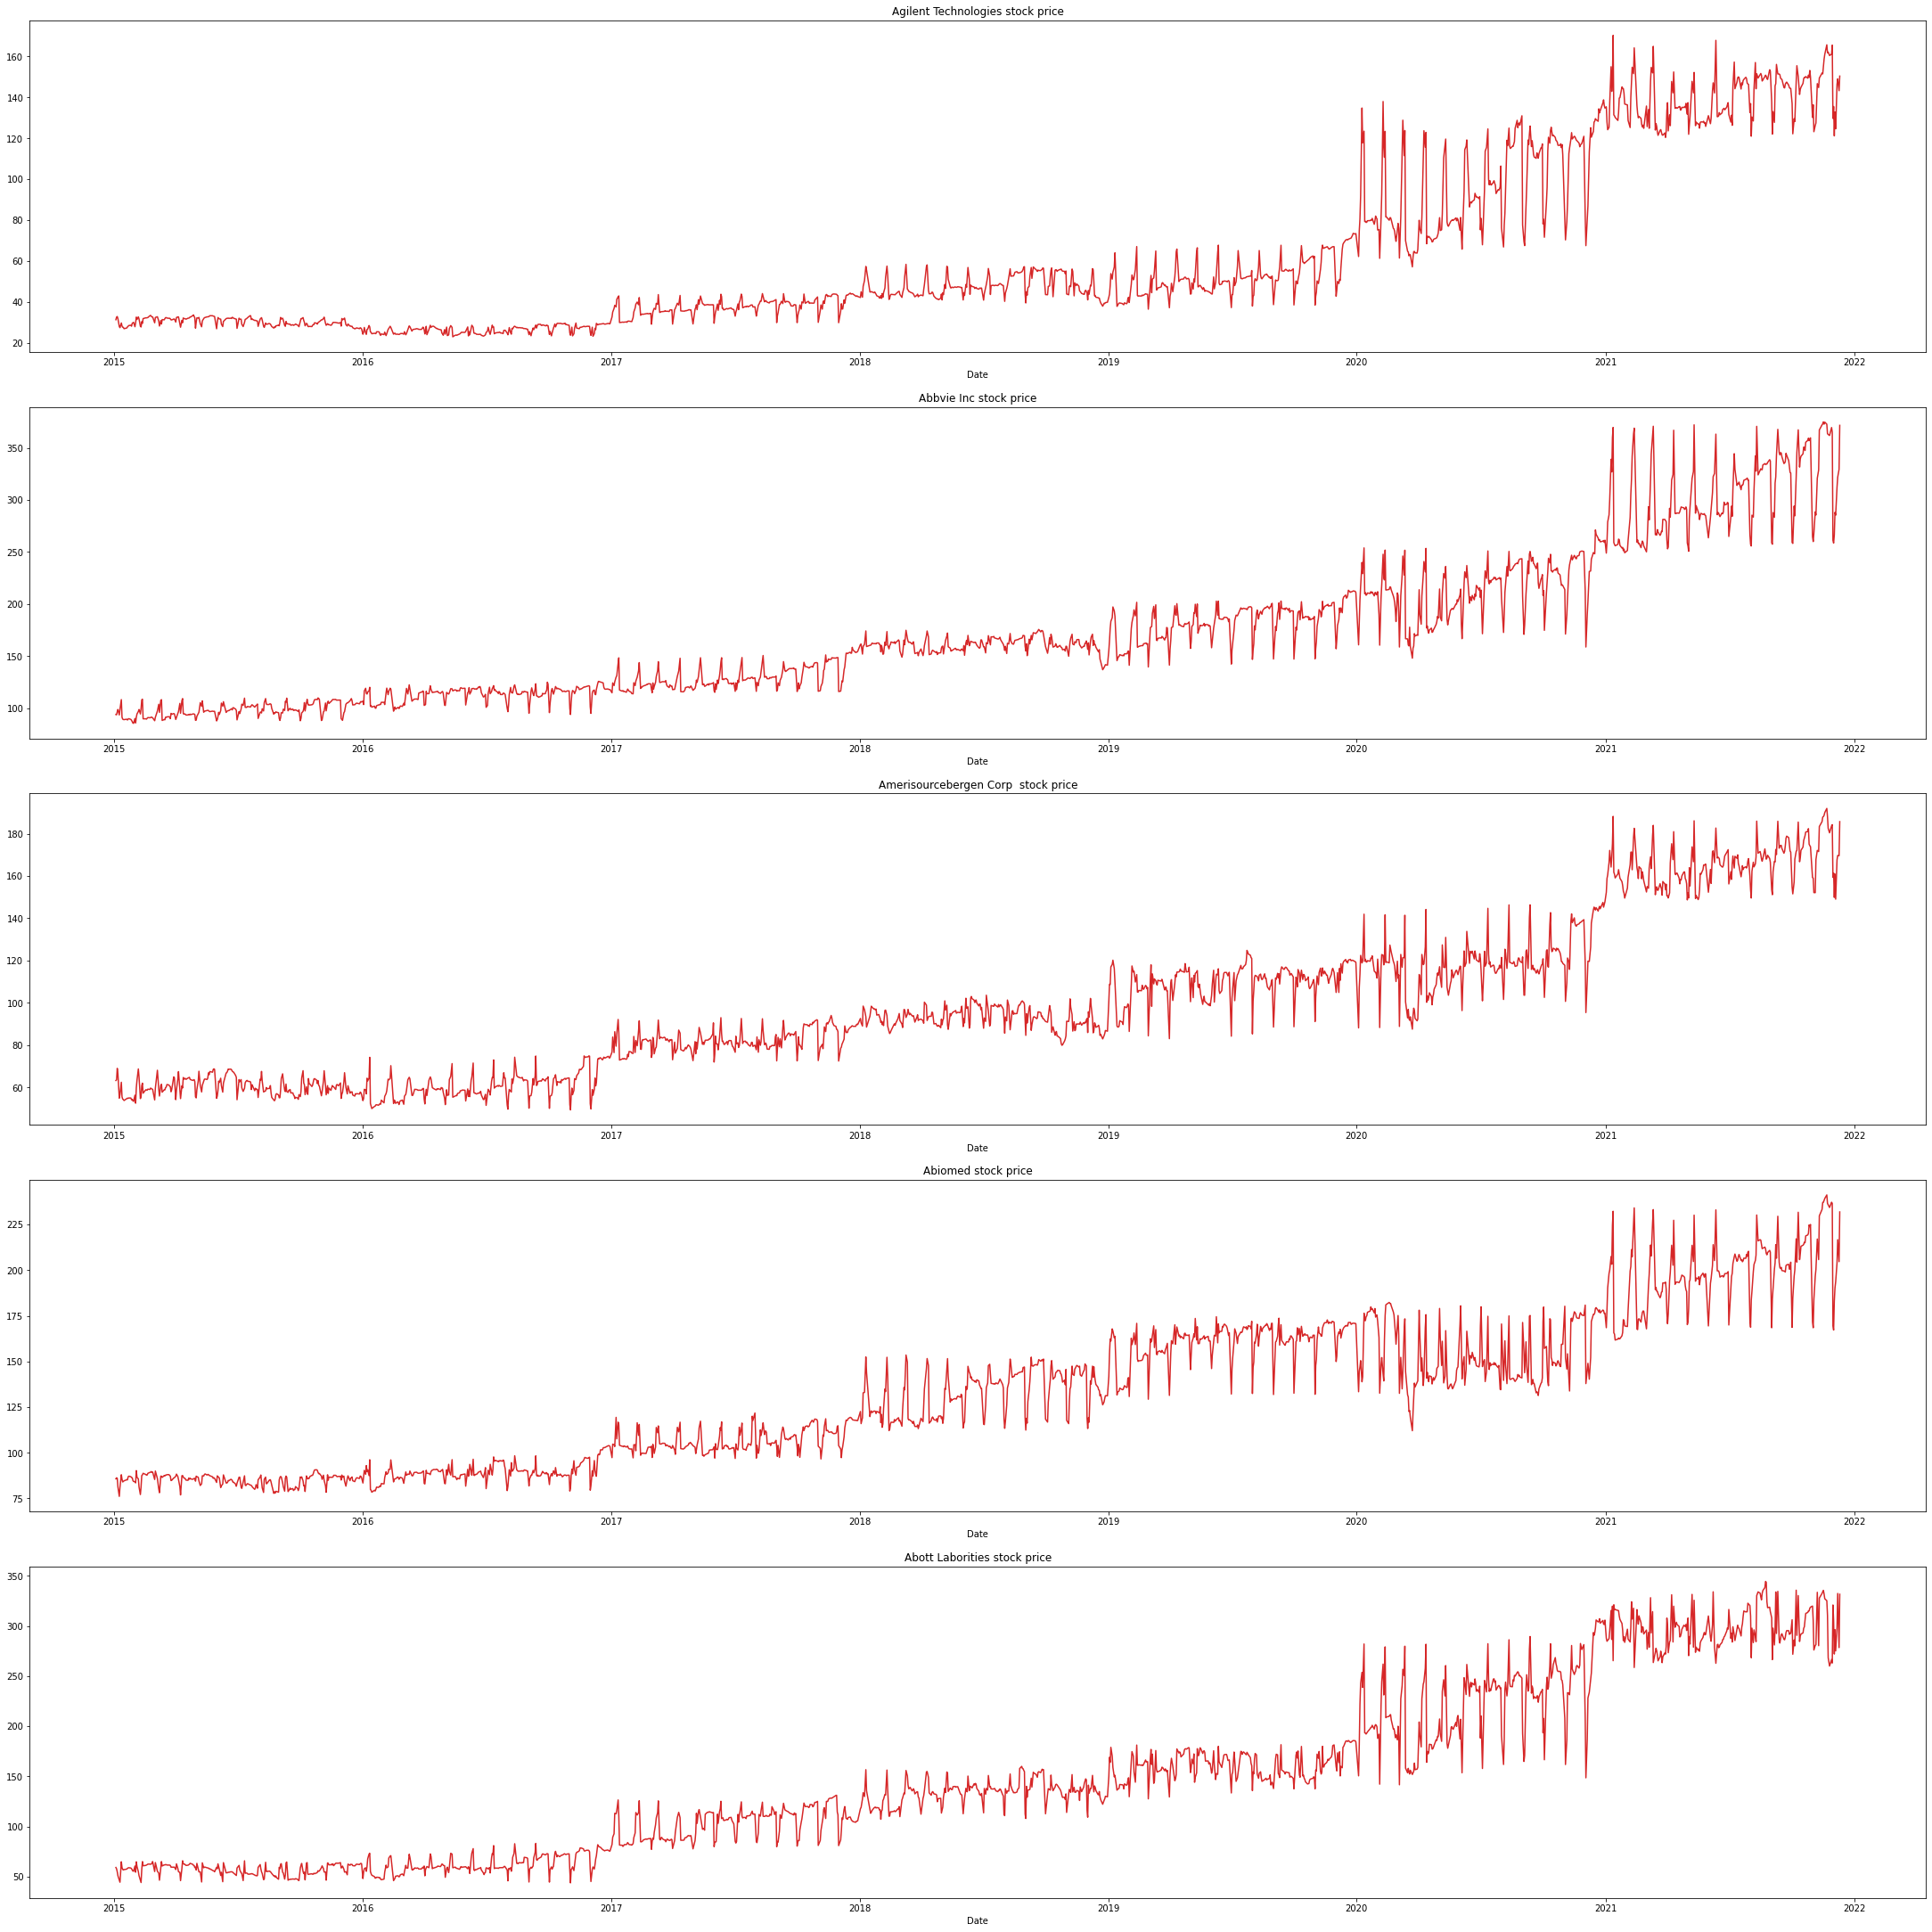

In [ ]:
#Comparison of the trends of confirmed COVID-19 cases and the stock price of the company under observation
fig, axs = plt.subplots(nrows= 5,constrained_layout=True,figsize=(30,30))

axs[0].plot(mean_df_AAPL.index, mean_df_AAPL['High'], 'tab:red')
axs[0].set_title('Agilent Technologies stock price')
axs[1].plot(mean_df_ACN.index, mean_df_ACN['High'], 'tab:red')
axs[1].set_title('Abbvie Inc stock price')
axs[2].plot(mean_df_ADI.index, mean_df_ADI['High'], 'tab:red')
axs[2].set_title('Amerisourcebergen Corp  stock price')
axs[3].plot(mean_df_ADP.index, mean_df_ADP['High'], 'tab:red')
axs[3].set_title('Abiomed stock price')
axs[4].plot(mean_df_ADSK.index, mean_df_ADSK['High'], 'tab:red')
axs[4].set_title('Abott Laborities stock price')
for ax in axs.flat:
    ax.set(xlabel='Date')

In [ ]:
stock_data_Industrials['Date'] = pd.to_datetime(stock_data_Industrials['Date'])
Precovid_stock_data_Industrials = stock_data_Industrials.loc[stock_data_Industrials.Date >= '01-01-2015'].copy()

Precovid_stock_data_Industrials

Date Code        Low  ...       High      Close  Adjusted Close
2332 2015-02-01  AAL  53.070000  ...  54.599998  53.910000       51.079910
2333 2015-05-01  AAL  53.340000  ...  54.540001  53.880001       51.051487
2334 2015-06-01  AAL  52.130001  ...  54.430000  53.040001       50.255577
2335 2015-07-01  AAL  52.119999  ...  53.650002  53.009998       50.227161
2336 2015-08-01  AAL  53.250000  ...  54.279999  53.660000       50.843033
...         ...  ...        ...  ...        ...        ...             ...
9621 2021-11-30  AOS  78.830002  ...  81.000000  79.050003       79.050003
9622 2021-01-12  AOS  79.379997  ...  82.570000  79.459999       79.459999
9623 2021-02-12  AOS  79.910004  ...  81.989998  81.080002       81.080002
9624 2021-03-12  AOS  80.610001  ...  82.430000  81.599998       81.599998
9625 2021-06-12  AOS  81.699997  ...  82.800003  81.800003       81.800003

[8725 rows x 8 columns]

In [ ]:
mean_df_AAL=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "AAL"]
mean_df_AAL = mean_df_AAL.groupby(['Date']).mean()
mean_df_ALK=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "ALK"]
mean_df_ALK = mean_df_ALK.groupby(['Date']).mean()
mean_df_ALLE=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "ALLE"]
mean_df_ALLE = mean_df_ALLE.groupby(['Date']).mean()
mean_df_AME=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "AME"]
mean_df_AME = mean_df_AME.groupby(['Date']).mean()
mean_df_AOS=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "AOS"]
mean_df_AOS = mean_df_AOS.groupby(['Date']).mean()

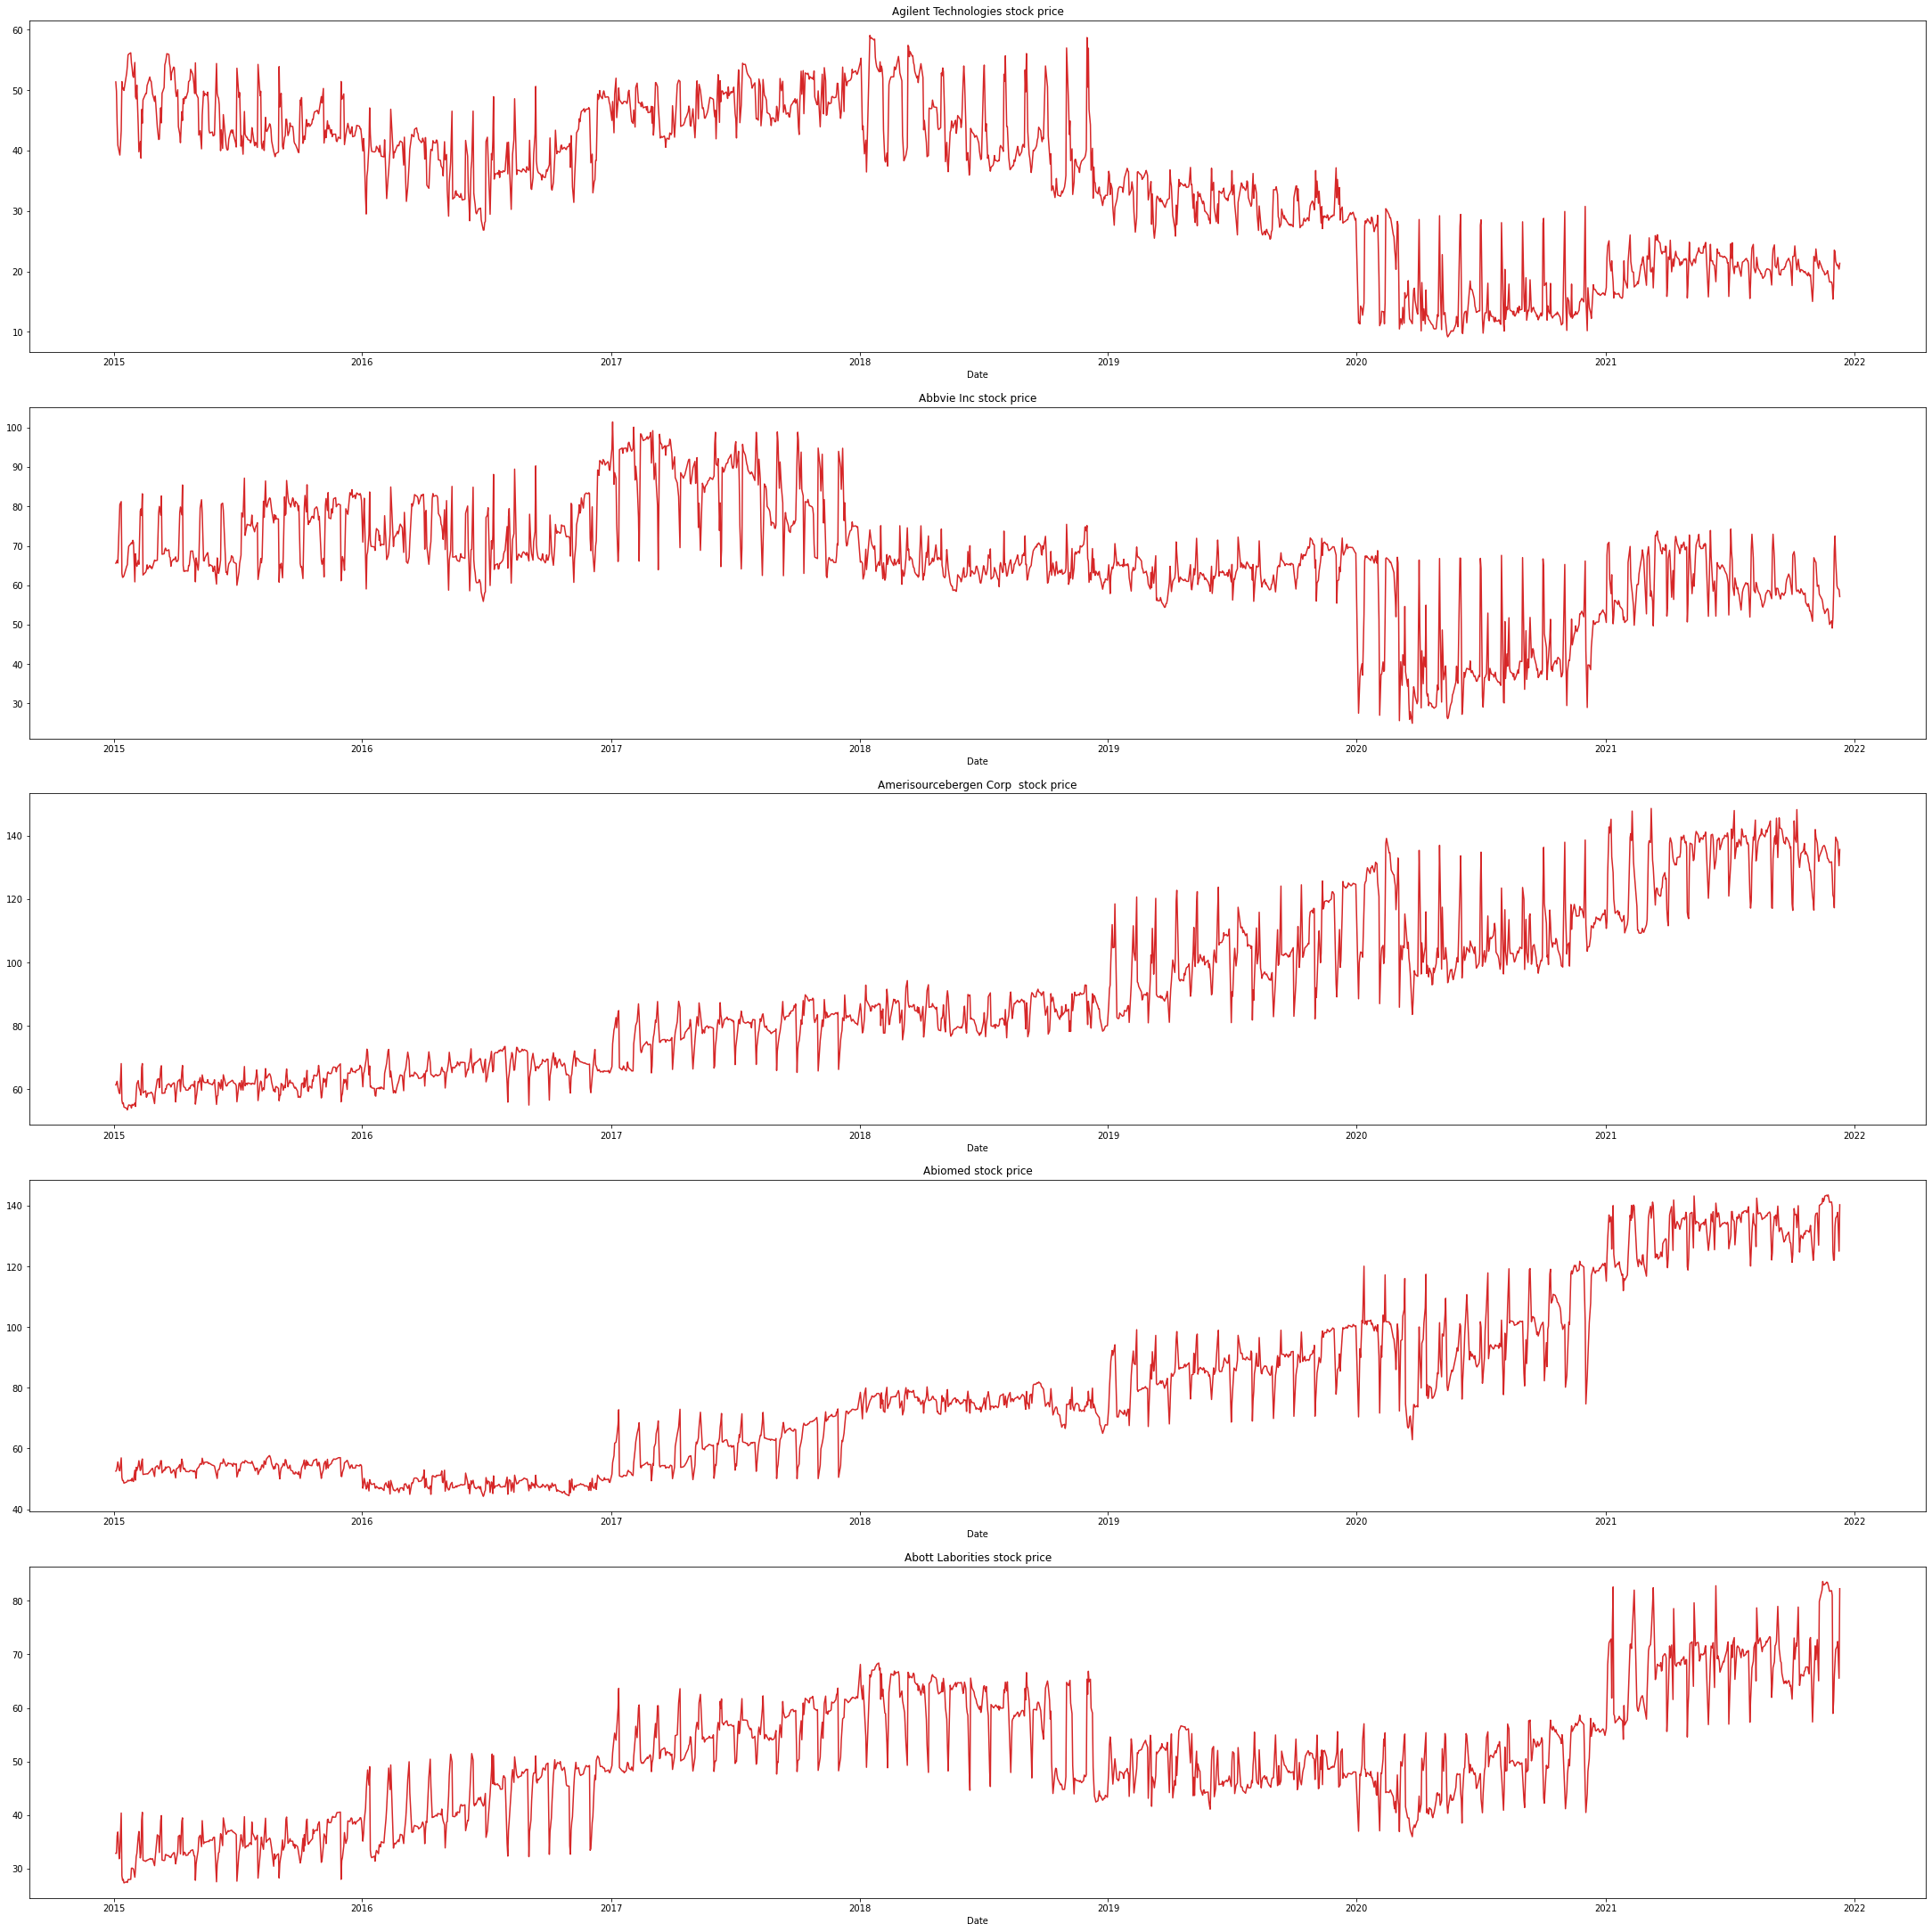

In [ ]:
#Comparison of the trends of confirmed COVID-19 cases and the stock price of the company under observation
fig, axs = plt.subplots(nrows= 5,constrained_layout=True,figsize=(30,30))

axs[0].plot(mean_df_AAL.index, mean_df_AAL['High'], 'tab:red')
axs[0].set_title('Agilent Technologies stock price')
axs[1].plot(mean_df_ALK.index, mean_df_ALK['High'], 'tab:red')
axs[1].set_title('Abbvie Inc stock price')
axs[2].plot(mean_df_ALLE.index, mean_df_ALLE['High'], 'tab:red')
axs[2].set_title('Amerisourcebergen Corp  stock price')
axs[3].plot(mean_df_AME.index, mean_df_AME['High'], 'tab:red')
axs[3].set_title('Abiomed stock price')
axs[4].plot(mean_df_AOS.index, mean_df_AOS['High'], 'tab:red')
axs[4].set_title('Abott Laborities stock price')
for ax in axs.flat:
    ax.set(xlabel='Date')

In [ ]:
type(stock_data)

pandas.core.frame.DataFrame

In [ ]:
stock_data.head()

Date Code        Low  ...       High      Close  Adjusted Close
0  18-11-1999    A  28.612303  ...  35.765381  31.473534       27.102232
1  19-11-1999    A  28.478184  ...  30.758226  28.880545       24.869375
2  22-11-1999    A  28.657009  ...  31.473534  31.473534       27.102232
3  23-11-1999    A  28.612303  ...  31.205294  28.612303       24.638391
4  24-11-1999    A  28.612303  ...  29.998213  29.372318       25.292847

[5 rows x 8 columns]

In [ ]:
covid.head()

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01-22-2020          Anhui  ...         1      0          0
1    2      01-22-2020        Beijing  ...        14      0          0
2    3      01-22-2020      Chongqing  ...         6      0          0
3    4      01-22-2020         Fujian  ...         1      0          0
4    5      01-22-2020          Gansu  ...         0      0          0

[5 rows x 8 columns]

In [ ]:
us_covid = covid[covid['Country/Region'] == 'US']

In [ ]:
us_covid = us_covid.drop(['Province/State'], axis = 1)

In [ ]:
us_covid.head()

SNo ObservationDate Country/Region  ... Confirmed  Deaths  Recovered
31    32      01-22-2020             US  ...         1       0          0
71    72      01-23-2020             US  ...         1       0          0
121  122      01-24-2020             US  ...         1       0          0
122  123      01-24-2020             US  ...         1       0          0
164  165      01-25-2020             US  ...         1       0          0

[5 rows x 7 columns]

In [ ]:
covid_data = us_covid.groupby('ObservationDate')

In [ ]:
covid_data.head()

SNo ObservationDate Country/Region  ... Confirmed  Deaths  Recovered
31          32      01-22-2020             US  ...         1       0          0
71          72      01-23-2020             US  ...         1       0          0
121        122      01-24-2020             US  ...         1       0          0
122        123      01-24-2020             US  ...         1       0          0
164        165      01-25-2020             US  ...         1       0          0
...        ...             ...            ...  ...       ...     ...        ...
305842  305843      05-29-2021             US  ...    543405   11146          0
305844  305845      05-29-2021             US  ...     70208     369          0
305869  305870      05-29-2021             US  ...    880466   17628          0
305870  305871      05-29-2021             US  ...    341290    5830          0
305913  305914      05-29-2021             US  ...   3788713   63236          0

[2450 rows x 7 columns]

###Merging datasets

In [ ]:
merged_data = pd.merge(us_covid, stock_data, 'inner', left_on = ['ObservationDate'], right_on = ['Date'])

In [ ]:
merged_data.shape

(35970, 15)

In [ ]:
merged_data

SNo ObservationDate  ...       Close Adjusted Close
0         563      02-01-2020  ...   85.949997      84.911362
1         563      02-01-2020  ...   85.080002      82.331718
2         563      02-01-2020  ...   89.550003      80.968918
3         563      02-01-2020  ...   86.949997      84.297462
4         563      02-01-2020  ...  168.809998     168.809998
...       ...             ...  ...         ...            ...
35965  292642      05-11-2021  ...  156.410004     156.410004
35966  292642      05-11-2021  ...  127.570000     127.103119
35967  292642      05-11-2021  ...  117.180000     117.180000
35968  292642      05-11-2021  ...  124.370003     124.370003
35969  292642      05-11-2021  ...  361.709991     361.709991

[35970 rows x 15 columns]

In [ ]:
#remove duplicates
merged_data = merged_data.drop(['SNo'], axis = 1)
merged_data.drop_duplicates(inplace = True)

In [ ]:
merged_data.to_csv(drive_path+'merged_data.csv')

In [ ]:
merged_data.dtypes

ObservationDate     object
Country/Region      object
Last Update         object
Confirmed            int64
Deaths               int64
Recovered            int64
Date                object
Code                object
Low                float64
Open               float64
Volume               int64
High               float64
Close              float64
Adjusted Close     float64
dtype: object

In [ ]:
#Null Values by %
merged_data.isnull().sum()/ len(merged_data) * 100

ObservationDate    0.0
Country/Region     0.0
Last Update        0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
Date               0.0
Code               0.0
Low                0.0
Open               0.0
Volume             0.0
High               0.0
Close              0.0
Adjusted Close     0.0
dtype: float64

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data = merged_data.loc[merged_data.Date > '28-01-2020'].copy()

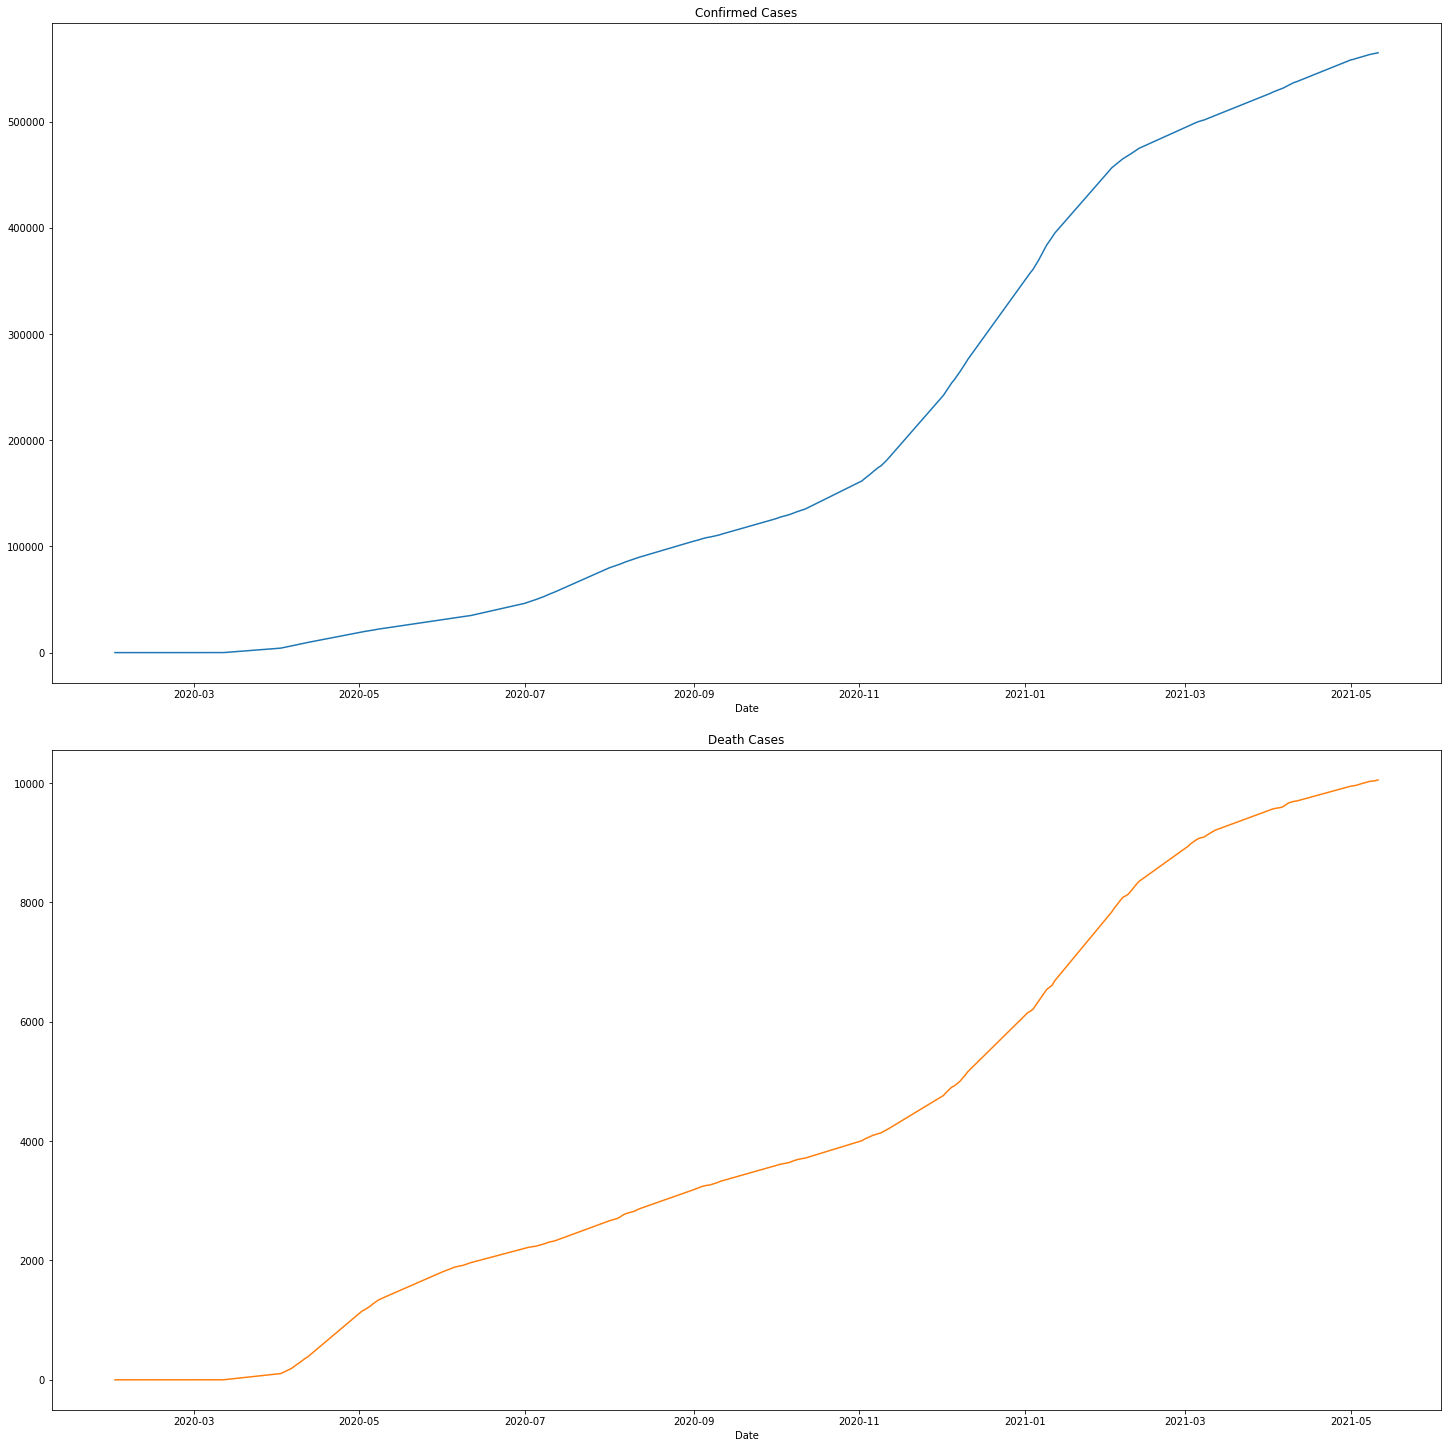

In [ ]:
#Comparison of the trends of confirmed COVID-19 cases and the stock price of the company under observation
fig, axs = plt.subplots(nrows= 2,constrained_layout=True,figsize=(20,20))

axs[0].plot(mean_df.index, mean_df['Confirmed'])
axs[0].set_title('Confirmed Cases')

axs[1].plot(mean_df.index, mean_df['Deaths'], 'tab:orange')
axs[1].set_title('Death Cases')

for ax in axs.flat:
    ax.set(xlabel='Date')

In [ ]:
industrials_merged_data = pd.read_csv(drive_path + "Industrials_merged_data.csv")

In [ ]:
industrials_merged_data

Unnamed: 0     SNo  ...       Close Adjusted Close
0               0     563  ...   29.090000      28.982893
1               1     563  ...   68.169998      67.785583
2               2     563  ...  125.389999     122.859001
3               3     563  ...  100.800003      99.565559
4               4     563  ...   47.770000      46.011982
...           ...     ...  ...         ...            ...
35965       35965  292642  ...   21.820000      21.820000
35966       35966  292642  ...   59.349998      59.349998
35967       35967  292642  ...  131.410004     131.410004
35968       35968  292642  ...  140.940002     140.940002
35969       35969  292642  ...   77.550003      77.550003

[35970 rows x 16 columns]

In [ ]:
industrials_merged_data['Date'] = pd.to_datetime(industrials_merged_data['Date'])
industrials_merged_data = industrials_merged_data.loc[industrials_merged_data.Date > '28-01-2020'].copy()

In [ ]:
IT_merged_data = pd.read_csv(drive_path + "IT_merged_data.csv")

In [ ]:
IT_merged_data

Unnamed: 0     SNo  ...       Close Adjusted Close
0               0     563  ...   75.087502      73.988464
1               1     563  ...  210.149994     204.304413
2               2     563  ...  120.430000     116.062119
3               3     563  ...  170.320007     163.903610
4               4     563  ...  187.830002     187.830002
...           ...     ...  ...         ...            ...
35965       35965  292642  ...  151.279999     151.279999
35966       35966  292642  ...  368.459991     368.459991
35967       35967  292642  ...  184.179993     183.477249
35968       35968  292642  ...  229.600006     229.600006
35969       35969  292642  ...  324.519989     324.519989

[35970 rows x 16 columns]

In [ ]:
IT_merged_data['Date'] = pd.to_datetime(IT_merged_data['Date'])
IT_merged_data = IT_merged_data.loc[IT_merged_data.Date > '28-01-2020'].copy()

In [ ]:
us_vaccinations = pd.read_csv(drive_path + "us_vaccinations.csv")
us_vaccinations.dropna(subset = ["people_fully_vaccinated"], inplace=True)
us_vaccinations.head()

country iso_code        date  people_fully_vaccinated
0  United States      USA  2021-01-14                1342086.0
1  United States      USA  2021-01-15                1610524.0
2  United States      USA  2021-01-19                2023124.0
3  United States      USA  2021-01-20                2161419.0
4  United States      USA  2021-01-21                2394961.0

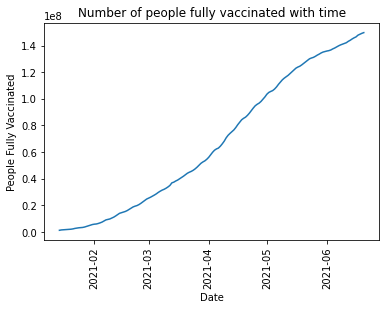

In [ ]:
us_vaccinations['date'] = pd.to_datetime(us_vaccinations['date'])

plt.title('Number of people fully vaccinated with time')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.xticks(rotation = 'vertical')
plt.plot(us_vaccinations['date'],us_vaccinations['people_fully_vaccinated'])

###Data Modeling

We have used Multiple Linear Regression to perform prediction of Stock market prices based on COVID-19. Multiple Linear Regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.<br>
Here, we estimate the relationship between COVID-19 confirmed cases, deaths, recovered cases and the closing stock price of companies in each sector.
<br><br>
We have performed a Train-Test-Split of 75% training data and 25% testing data.<br>
Input variables – Confirmed cases, Deaths, Recovered, High, Low<br>
Target variable – Close price


In [ ]:
#importing necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def train_test(data_X,data_Y):
  train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)
  print('\n\nTraining Set')
  print(train_X.head())
  print(train_y.head())
  #Creating the Regressor
  regressor = LinearRegression()
  regressor.fit(train_X,train_y)
  #Make Predictions and Evaluate the results
  predict_y = regressor.predict(test_X)
  print('Prediction Score : ' , regressor.score(test_X,test_y))
  error = mean_squared_error(test_y,predict_y)
  print('Mean Squared Error : ',error)
  #Plot the predicted and the expected values
  fig, axs = plt.subplots(nrows= 2,constrained_layout=True,figsize=(20,20))
  axs[0].plot(test_X['Open'],test_y,'tab:orange')
  axs[0].set_title('Actual Price')

  axs[1].plot(test_X['Open'],predict_y, 'tab:blue')
  axs[1].set_title('Predicted Price')
  #Plot the predicted and the expected values
  fig = plt.figure()
  ax = plt.axes()
  ax.grid()
  ax.set(xlabel='Close ($)',ylabel='Open ($)', title=' Stock Prediction using Linear Regression')
  ax.plot(test_X['Open'],test_y,'tab:orange')
  ax.plot(test_X['Open'],predict_y, 'tab:blue')
  fig.savefig('LRPlot.png')
  plt.show()



Training Set
                  Low       Open   Volume       High  Adjusted Close
Date                                                                
2017-08-30  63.389999  63.400002  1072500  63.930000       61.754417
2019-09-18  75.750000  76.360001  1982600  77.570000       76.306969
2015-09-01  40.290001  41.000000  1644900  41.000000       38.213207
2017-02-05  55.509998  55.849998  1693100  55.970001       53.931911
2016-08-12  44.770000  44.990002  1848400  45.830002       43.927273
Date
2017-08-30    63.900002
2019-09-18    77.570000
2015-09-01    40.590000
2017-02-05    55.930000
2016-08-12    45.799999
Name: Close, dtype: float64
Prediction Score :  0.9999528047846773
Mean Squared Error :  0.05726740617511196


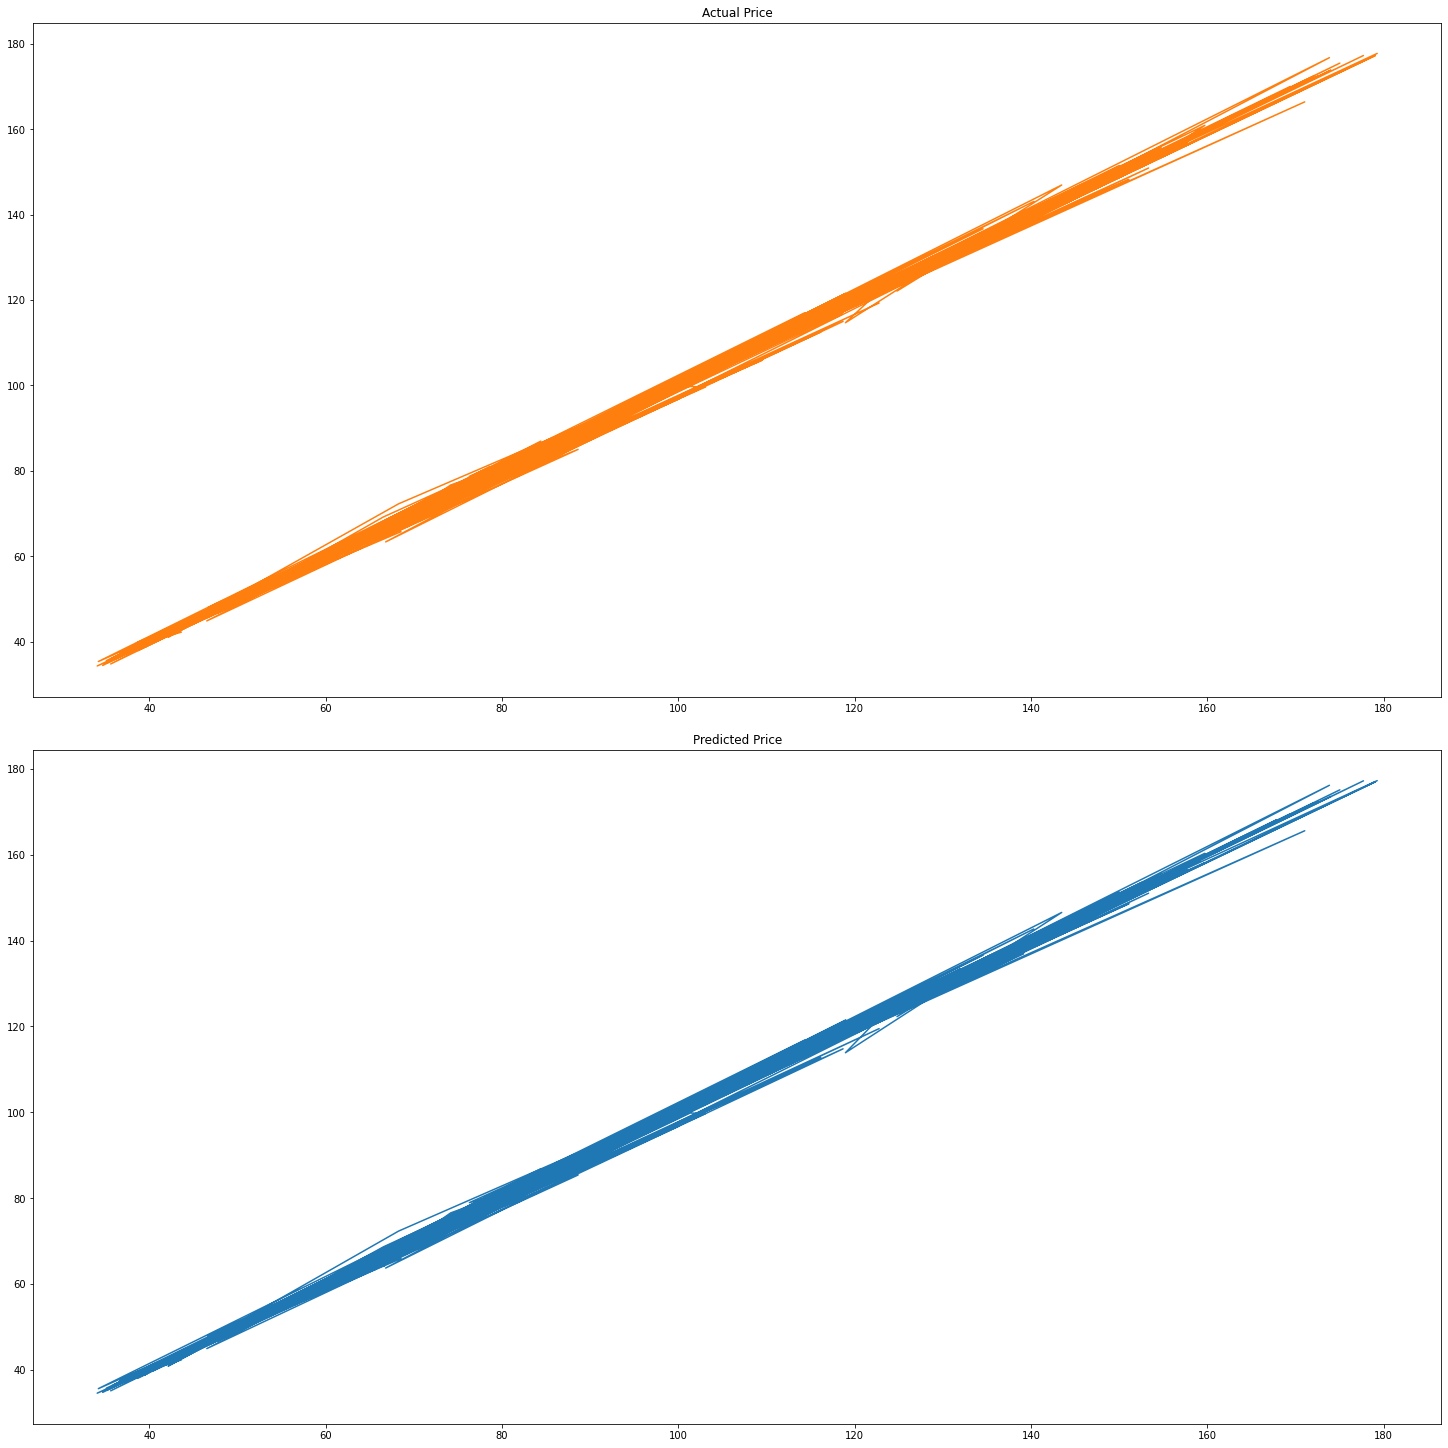

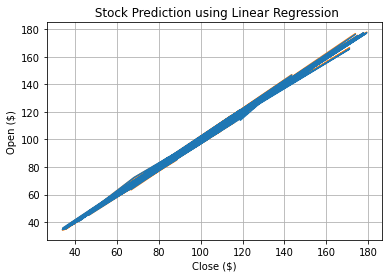

In [ ]:
#Agilent Technologies price predcition
data_X = mean_df_A.loc[:,mean_df_A.columns !=  'Close' ]
data_Y = mean_df_A['Close']
train_test(data_X,data_Y)



Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2015-06-16  110.169998  110.680000  1671200  112.089996       99.615738
2017-06-28   96.070000   96.169998   897600   97.110001       89.109489
2018-12-20   72.139999   75.849998  2130700   77.019997       69.512604
2018-02-14   95.599998   97.250000  3976900   98.190002       89.962006
2015-04-22  113.370003  113.849998  1145300  114.410004      101.713470
Date
2015-06-16    111.180000
2017-06-28     96.379997
2018-12-20     73.220001
2018-02-14     96.400002
2015-04-22    113.809998
Name: Close, dtype: float64
Prediction Score :  0.9975903867648164
Mean Squared Error :  0.42676762021351344


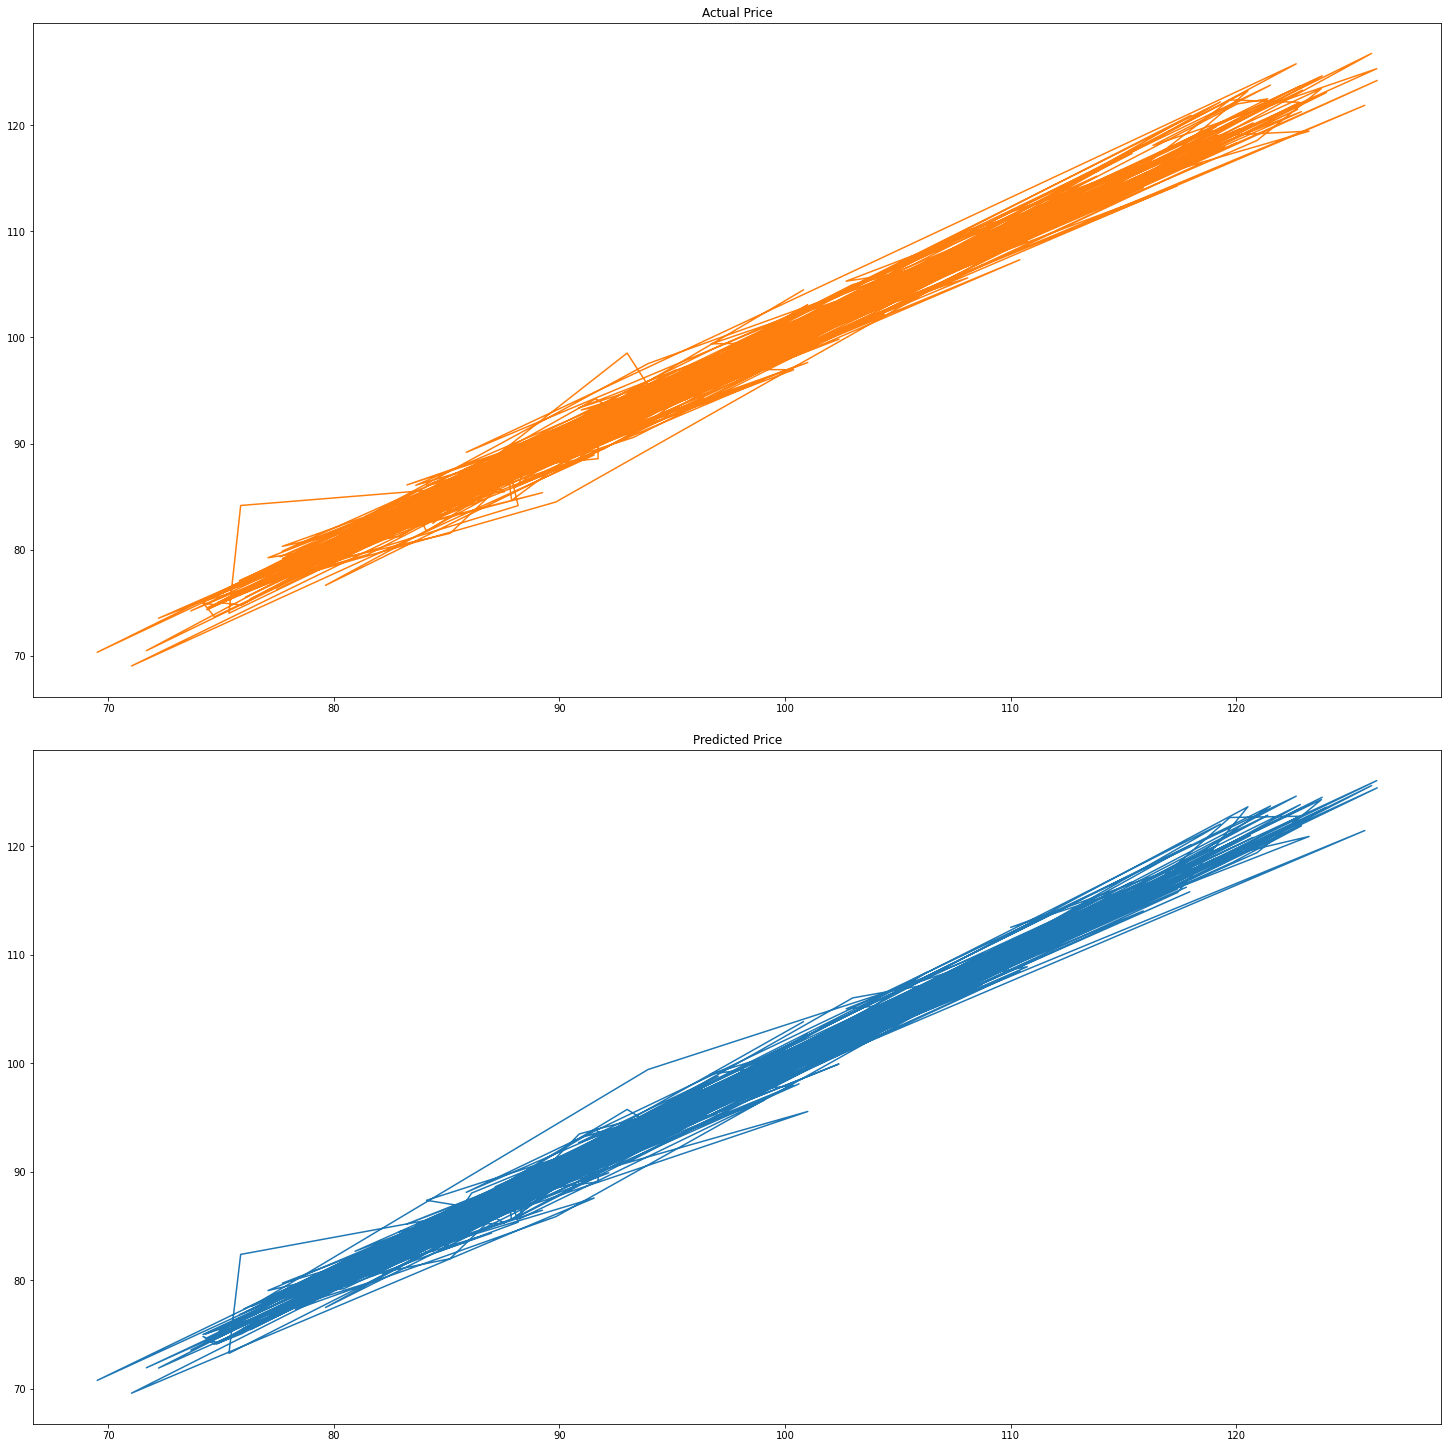

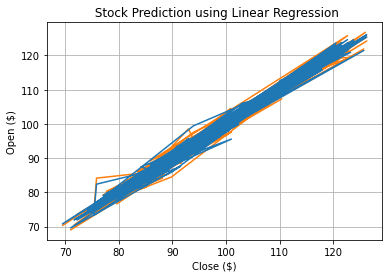

In [ ]:
#Amerisourcebergen Corp price predcition
data_X_1 = mean_df_ABC.loc[:,mean_df_ABC.columns !=  'Close' ]
data_Y_1 = mean_df_ABC['Close']
train_test(data_X_1,data_Y_1)



Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2021-09-20  105.559998  106.099998  7103400  107.489998      105.125511
2019-09-10   73.250000   74.070000  5851000   74.620003       65.323555
2021-03-06  110.650002  111.120003  6286100  112.410004      109.643578
2017-06-23   72.260002   73.199997  7064500   73.489998       58.889149
2015-01-27   62.200001   62.330002  6532300   63.500000       47.094330
Date
2021-09-20    106.400002
2019-09-10     73.300003
2021-03-06    112.209999
2017-06-23     72.639999
2015-01-27     63.099998
Name: Close, dtype: float64
Prediction Score :  0.9991490454880461
Mean Squared Error :  0.3063816822156966


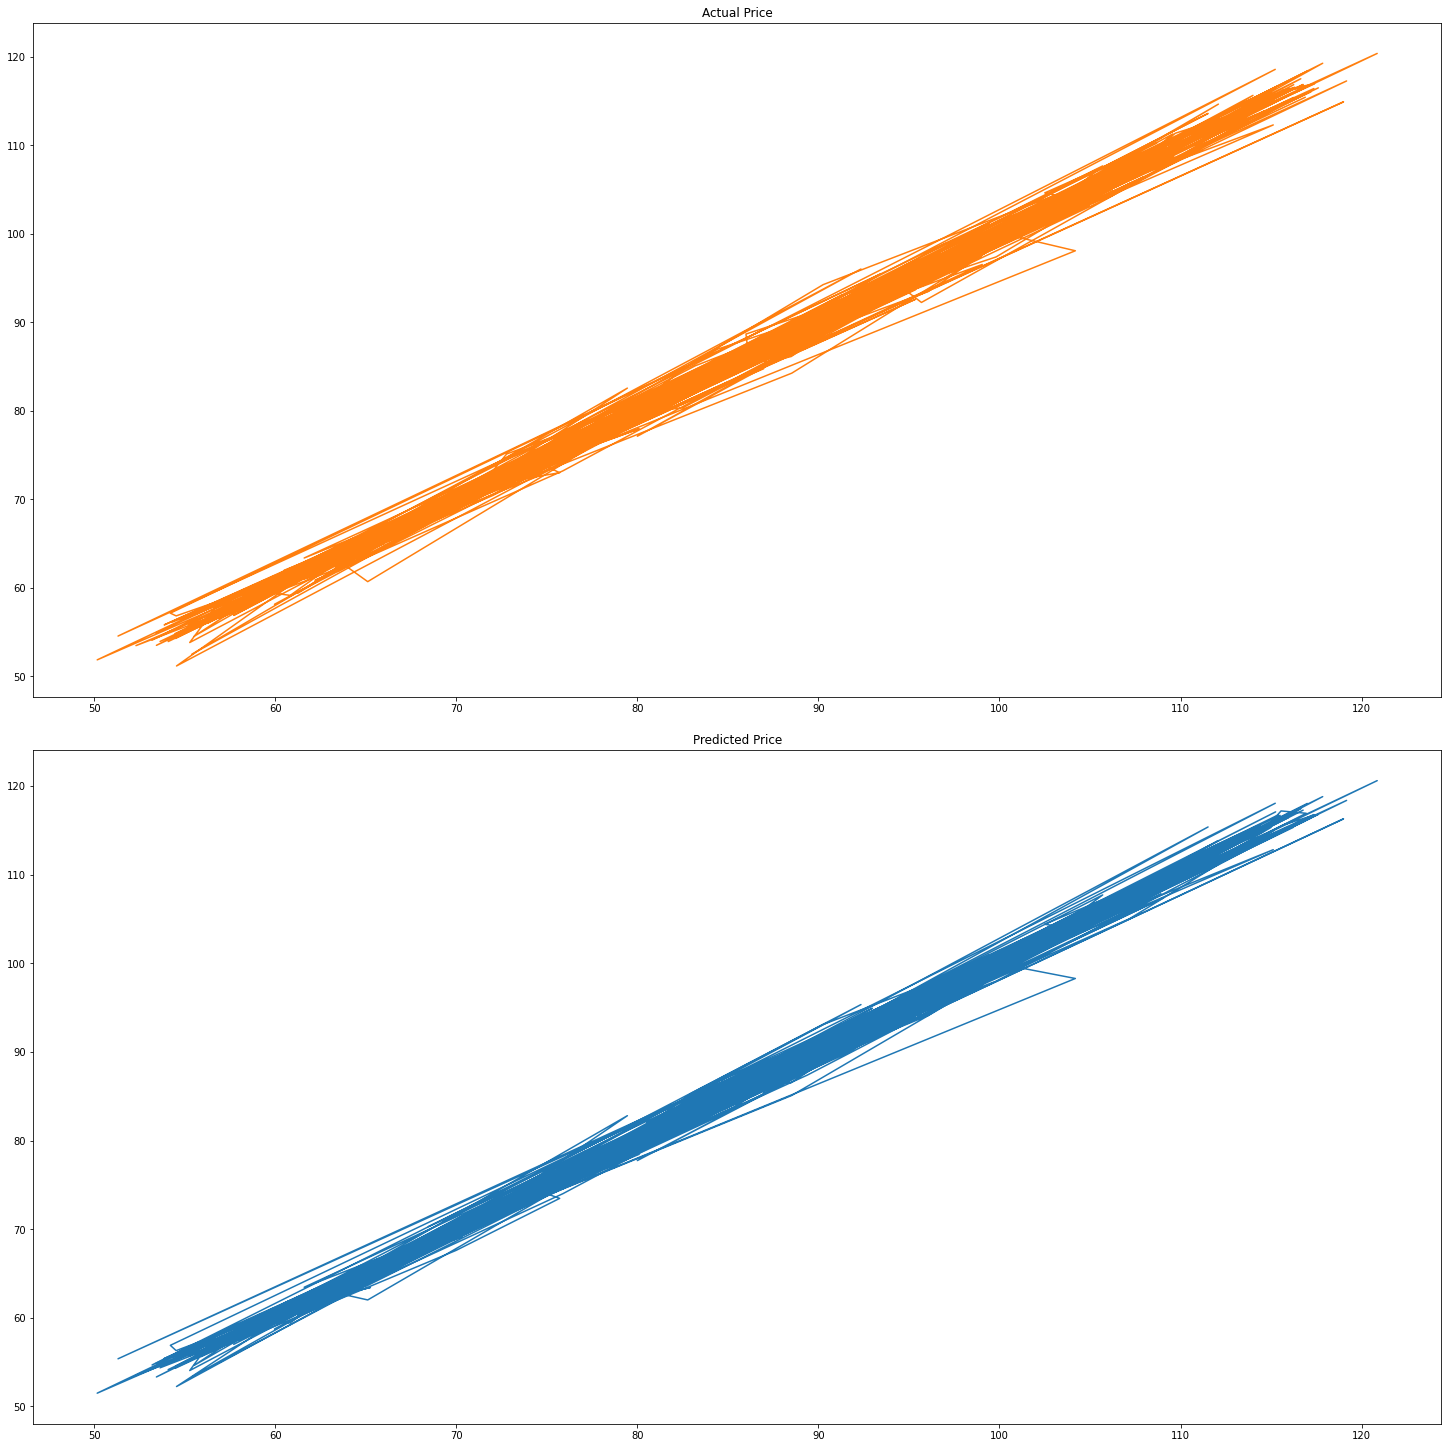

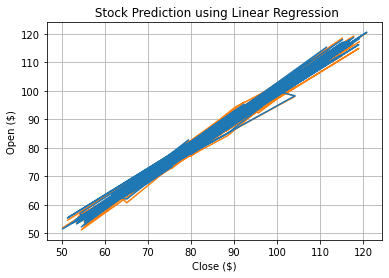

In [ ]:
#Abbvie Inc price predcition
data_X_2 = mean_df_ABBV.loc[:,mean_df_ABBV.columns !=  'Close' ]
data_Y_2 = mean_df_ABBV['Close']
train_test(data_X_2,data_Y_2)

IT industry



Training Set
                   Low        Open     Volume        High  Adjusted Close
Date                                                                     
2018-09-08   51.799999   52.382500   93970400   52.445000       50.341179
2018-02-15   42.250000   42.447498  204588800   43.272499       41.531349
2018-11-16   47.365002   47.625000  147713200   48.742500       46.968636
2020-12-08  110.297501  110.497498  165598000  113.275002      112.124146
2018-01-11   54.202499   54.762501  233292800   55.590000       53.744015
Date
2018-09-08     52.220001
2018-02-15     43.247501
2018-11-16     48.382500
2020-12-08    113.010002
2018-01-11     55.555000
Name: Close, dtype: float64
Prediction Score :  0.9999237798137502
Mean Squared Error :  0.12375110904137782


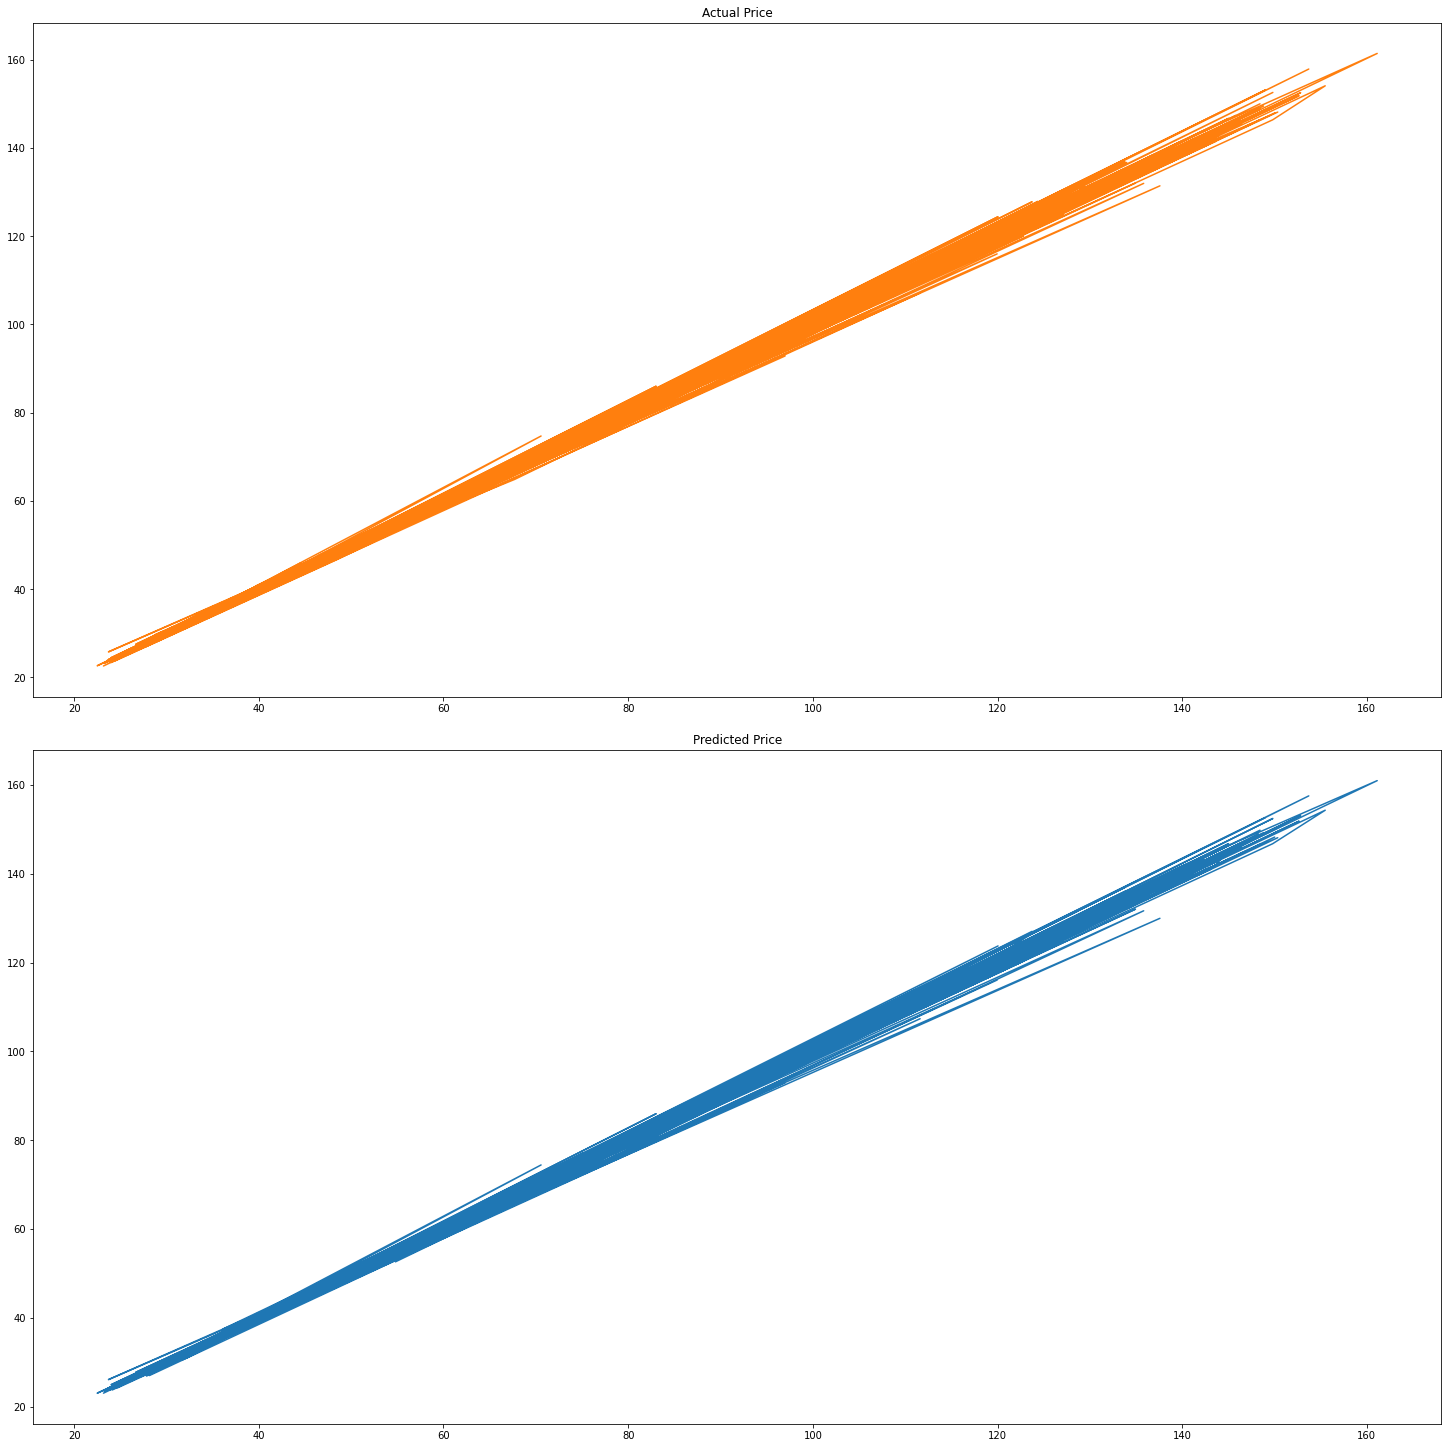

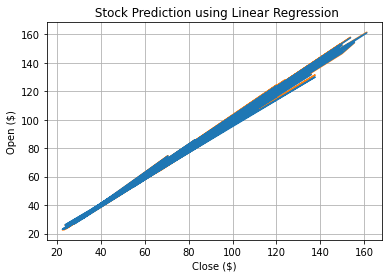

In [ ]:
#Apple price prediction

data_X_IT_1 = mean_df_AAPL.loc[:,mean_df_AAPL.columns !=  'Close' ]
data_Y_IT_1 = mean_df_AAPL['Close']
train_test(data_X_IT_1,data_Y_IT_1)



Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2015-02-11  107.080002  107.080002  2484600  107.930000       97.496758
2017-07-20  127.650002  127.900002  1655300  128.759995      120.057526
2020-10-01  206.729996  206.929993  1573100  208.309998      201.883682
2017-12-21  153.910004  156.300003  4563600  158.440002      145.419113
2015-04-11  106.459999  107.330002  2625600  107.330002       96.518158
Date
2015-02-11    107.599998
2017-07-20    128.539993
2020-10-01    207.660004
2017-12-21    154.199997
2015-04-11    106.519997
Name: Close, dtype: float64
Prediction Score :  0.9998912638817654
Mean Squared Error :  0.48578677431129713


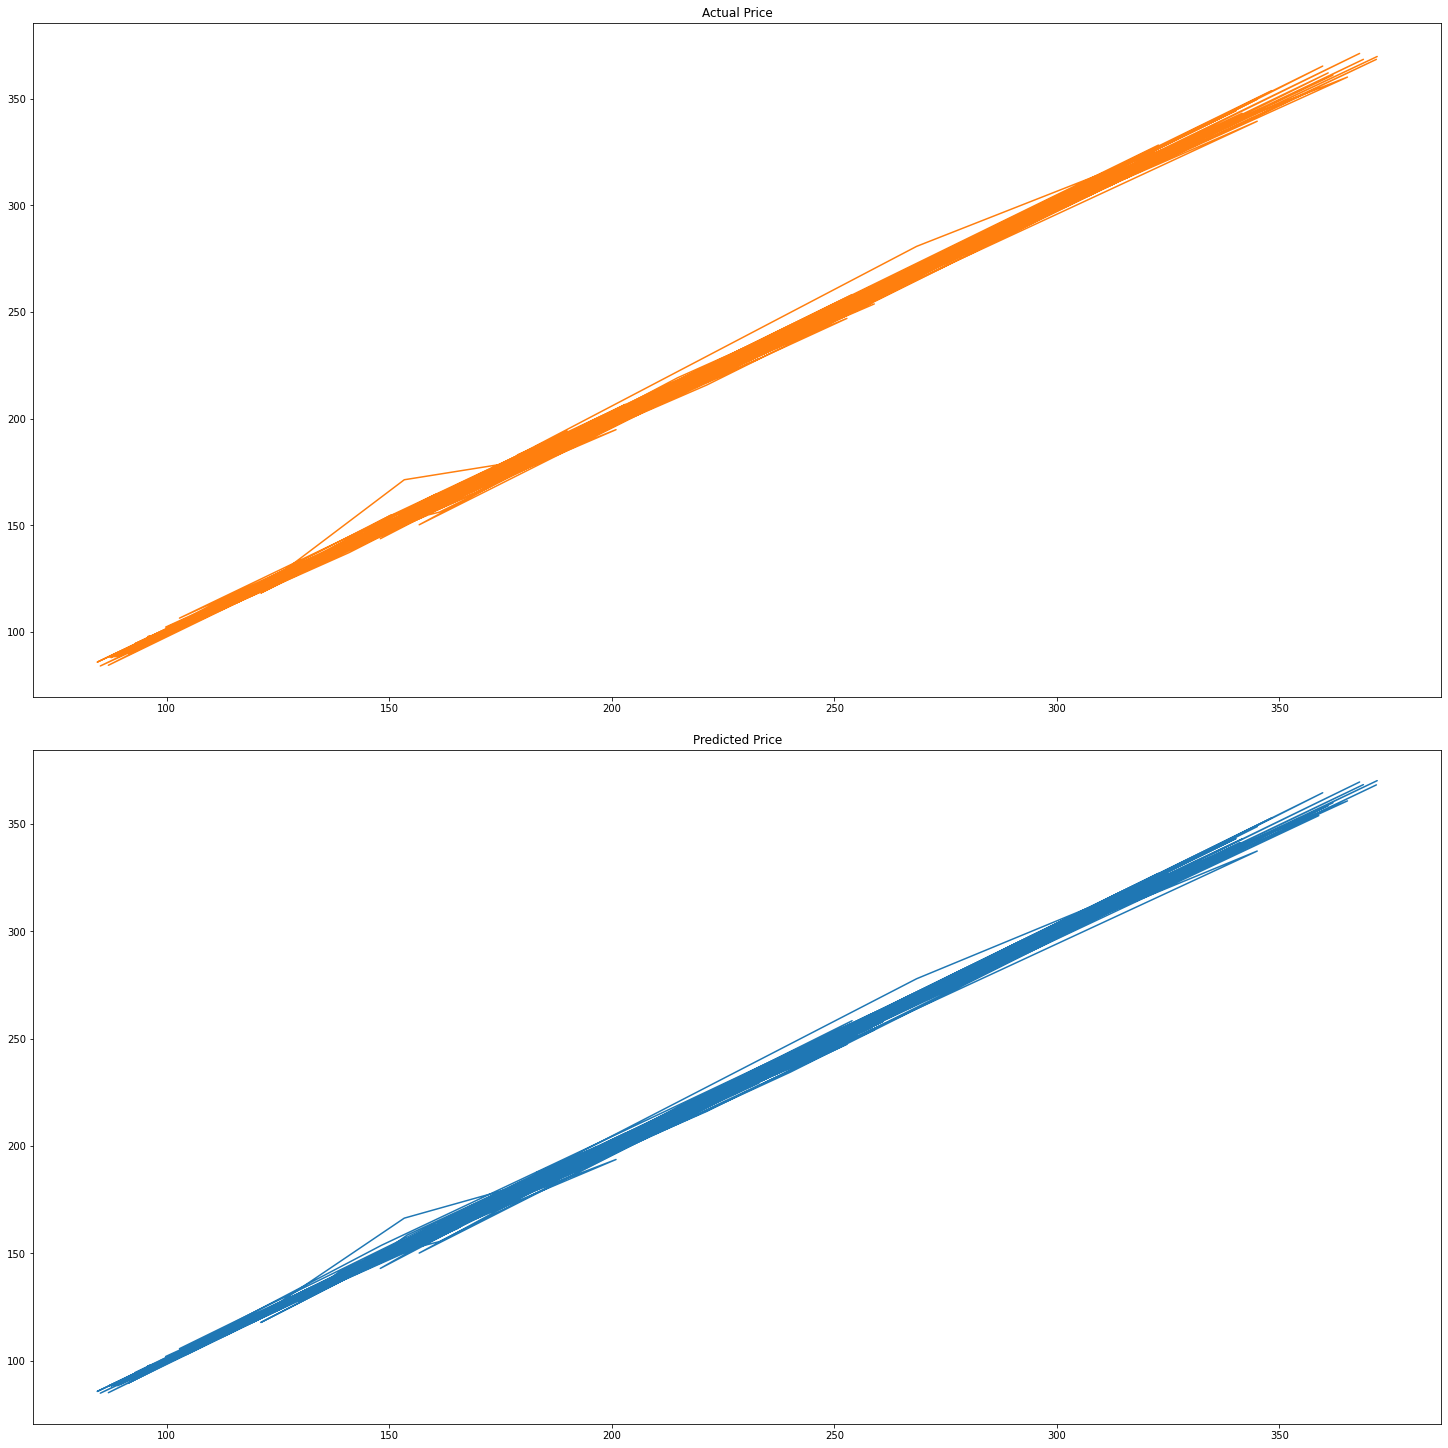

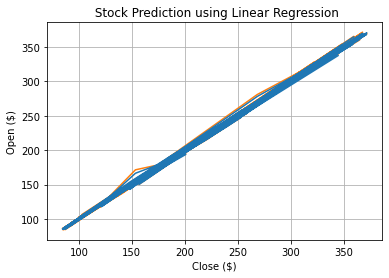

In [ ]:
#Accenture Plc Price Prediction
data_X_IT_2 = mean_df_ACN.loc[:,mean_df_ACN.columns !=  'Close' ]
data_Y_IT_2 = mean_df_ACN['Close']
train_test(data_X_IT_2,data_Y_IT_2)





Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2015-11-05   62.630001   62.750000  1396700   63.000000       54.057404
2018-10-05   92.389999   93.080002  1914400   93.400002       86.837975
2021-06-16  164.449997  168.059998  2360900  168.630005      164.690720
2021-08-24  164.750000  169.839996  8137000  170.360001      164.522079
2021-03-06  161.020004  161.639999  2553700  163.729996      160.772354
Date
2015-11-05     62.639999
2018-10-05     93.339996
2021-06-16    166.020004
2021-08-24    165.850006
2021-03-06    162.070007
Name: Close, dtype: float64
Prediction Score :  0.9997206813473953
Mean Squared Error :  0.33509553095327205


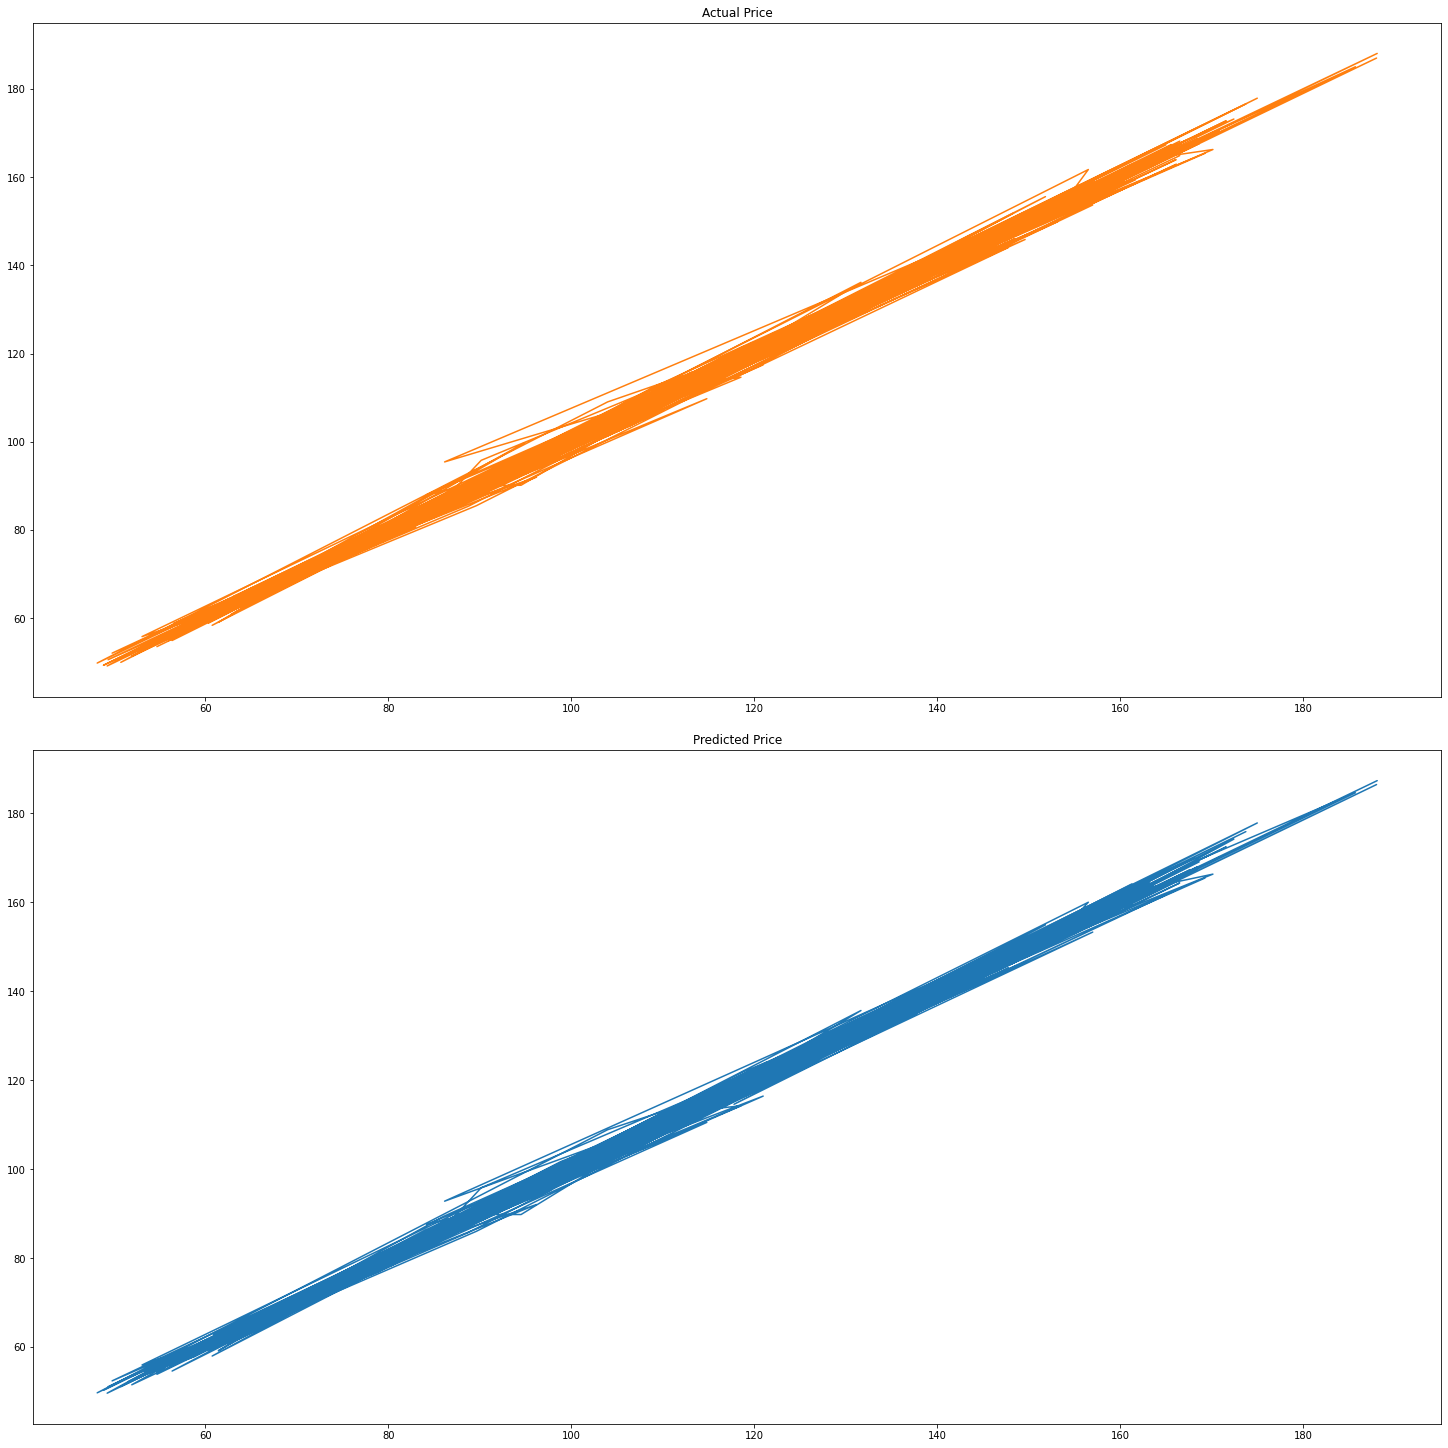

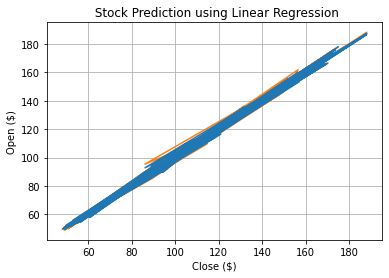

In [ ]:
#Analog Devices Price Prediction
data_X_IT_3 = mean_df_ADI.loc[:,mean_df_ADI.columns !=  'Close' ]
data_Y_IT_3 = mean_df_ADI['Close']
train_test(data_X_IT_3,data_Y_IT_3)

Price Prediction of Industries



Training Set
                  Low       Open     Volume       High  Adjusted Close
Date                                                                  
2020-12-03  13.330000  14.050000   53968500  15.750000       13.450000
2017-11-22  48.270000  48.580002    2326900  48.970001       47.427254
2020-04-05   9.150000   9.410000  125580000  10.170000        9.820000
2017-08-21  45.410000  45.730000    4353900  46.090000       44.454655
2017-01-24  46.799999  47.049999    4926700  47.799999       45.939476
Date
2020-12-03    13.450000
2017-11-22    48.660000
2020-04-05     9.820000
2017-08-21    45.709999
2017-01-24    47.540001
Name: Close, dtype: float64
Prediction Score :  0.9994652055621148
Mean Squared Error :  0.07947558408876756


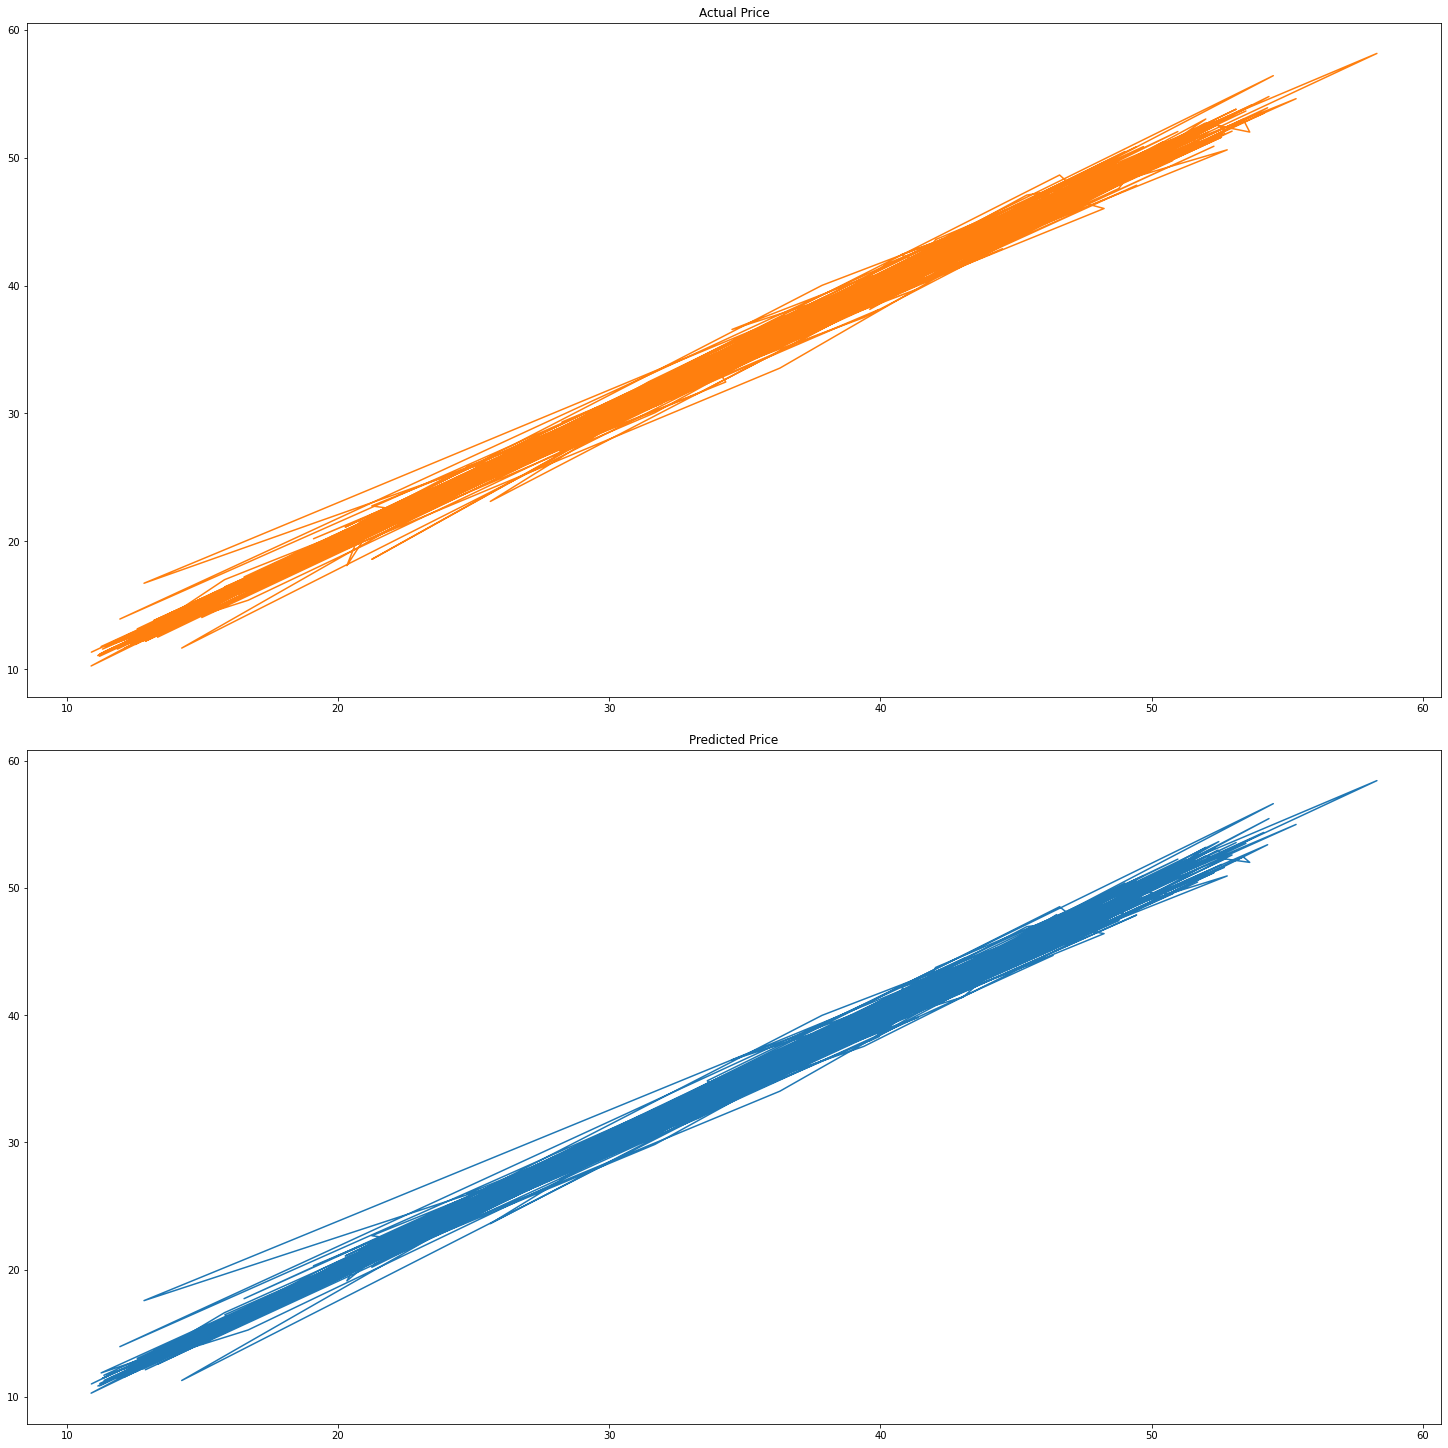

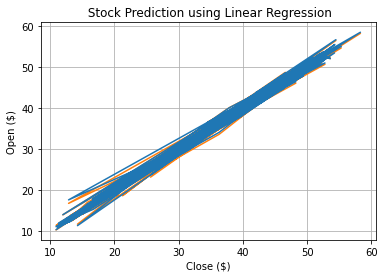

In [ ]:
#American Airlines Price Prediction
data_X_IN_1 = mean_df_AAL.loc[:,mean_df_AAL.columns !=  'Close' ]
data_Y_IN_1 = mean_df_AAL['Close']
train_test(data_X_IN_1,data_Y_IN_1)



Training Set
                  Low       Open   Volume       High  Adjusted Close
Date                                                                
2018-09-07  62.360001  62.480000  1499400  63.860001       61.183437
2019-07-15  63.250000  64.139999   946300  64.580002       62.325890
2020-06-05  27.200001  28.879999  2994900  29.059999       27.830000
2018-12-12  61.650002  63.040001  2916100  63.279999       60.346561
2021-11-01  49.599998  50.099998  1955800  50.849998       50.150002
Date
2018-09-07    63.490002
2019-07-15    63.360001
2020-06-05    27.830000
2018-12-12    62.020000
2021-11-01    50.150002
Name: Close, dtype: float64
Prediction Score :  0.9986058934773355
Mean Squared Error :  0.2954266746080844


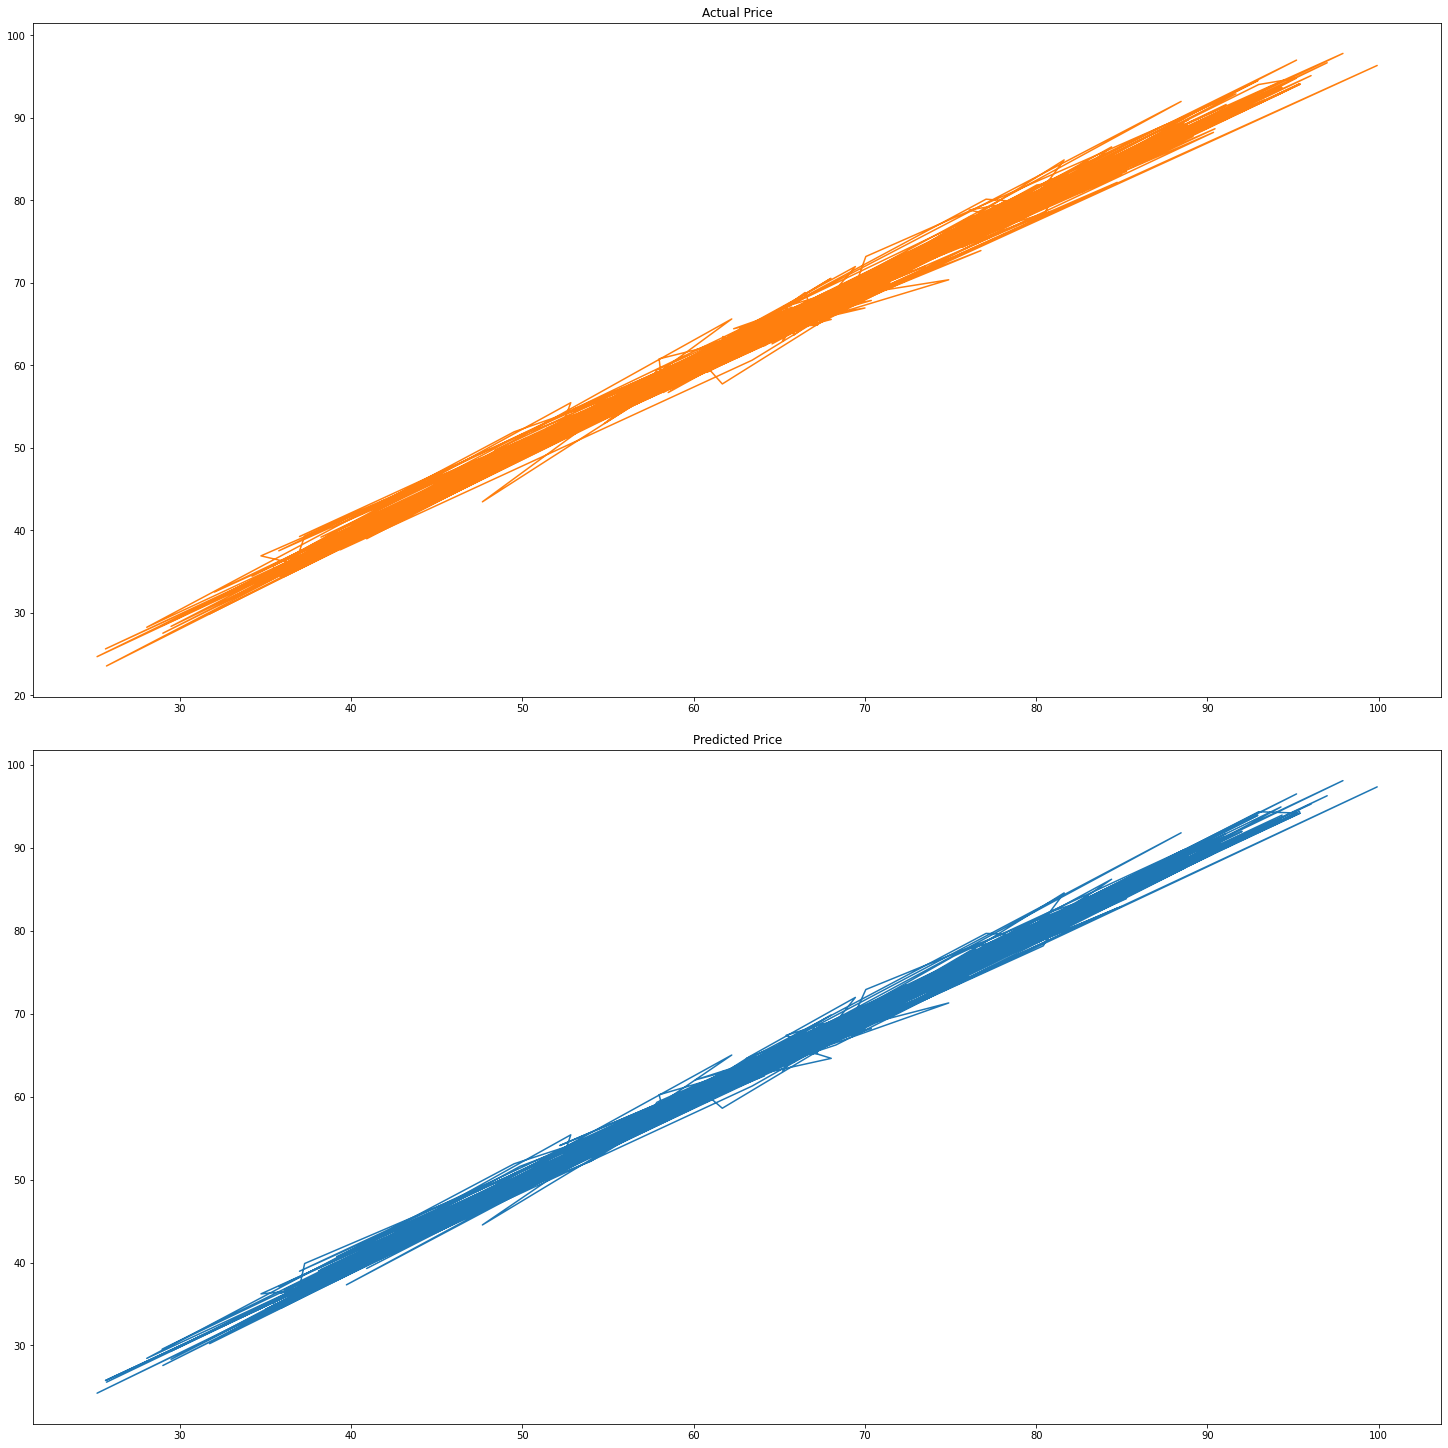

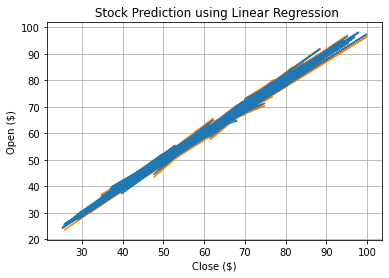

In [ ]:
#Alaska Air Group Price Prediction
data_X_IN_2 = mean_df_ALK.loc[:,mean_df_ALK.columns !=  'Close' ]
data_Y_IN_2 = mean_df_ALK['Close']
train_test(data_X_IN_2,data_Y_IN_2)



Training Set
                   Low        Open  Volume        High  Adjusted Close
Date                                                                  
2016-03-29   62.959999   63.410000  589800   63.810001       60.284168
2017-07-24   79.690002   80.339996  286000   80.690002       76.808037
2020-10-07   99.510002  100.269997  436600  101.739998      100.059151
2021-10-20  135.070007  135.250000  625400  137.639999      136.850006
2016-09-03   62.869999   63.430000  479000   63.680000       59.868137
Date
2016-03-29     63.639999
2017-07-24     80.309998
2020-10-07    101.510002
2021-10-20    136.850006
2016-09-03     63.320000
Name: Close, dtype: float64
Prediction Score :  0.9996904973457377
Mean Squared Error :  0.18003339667162374


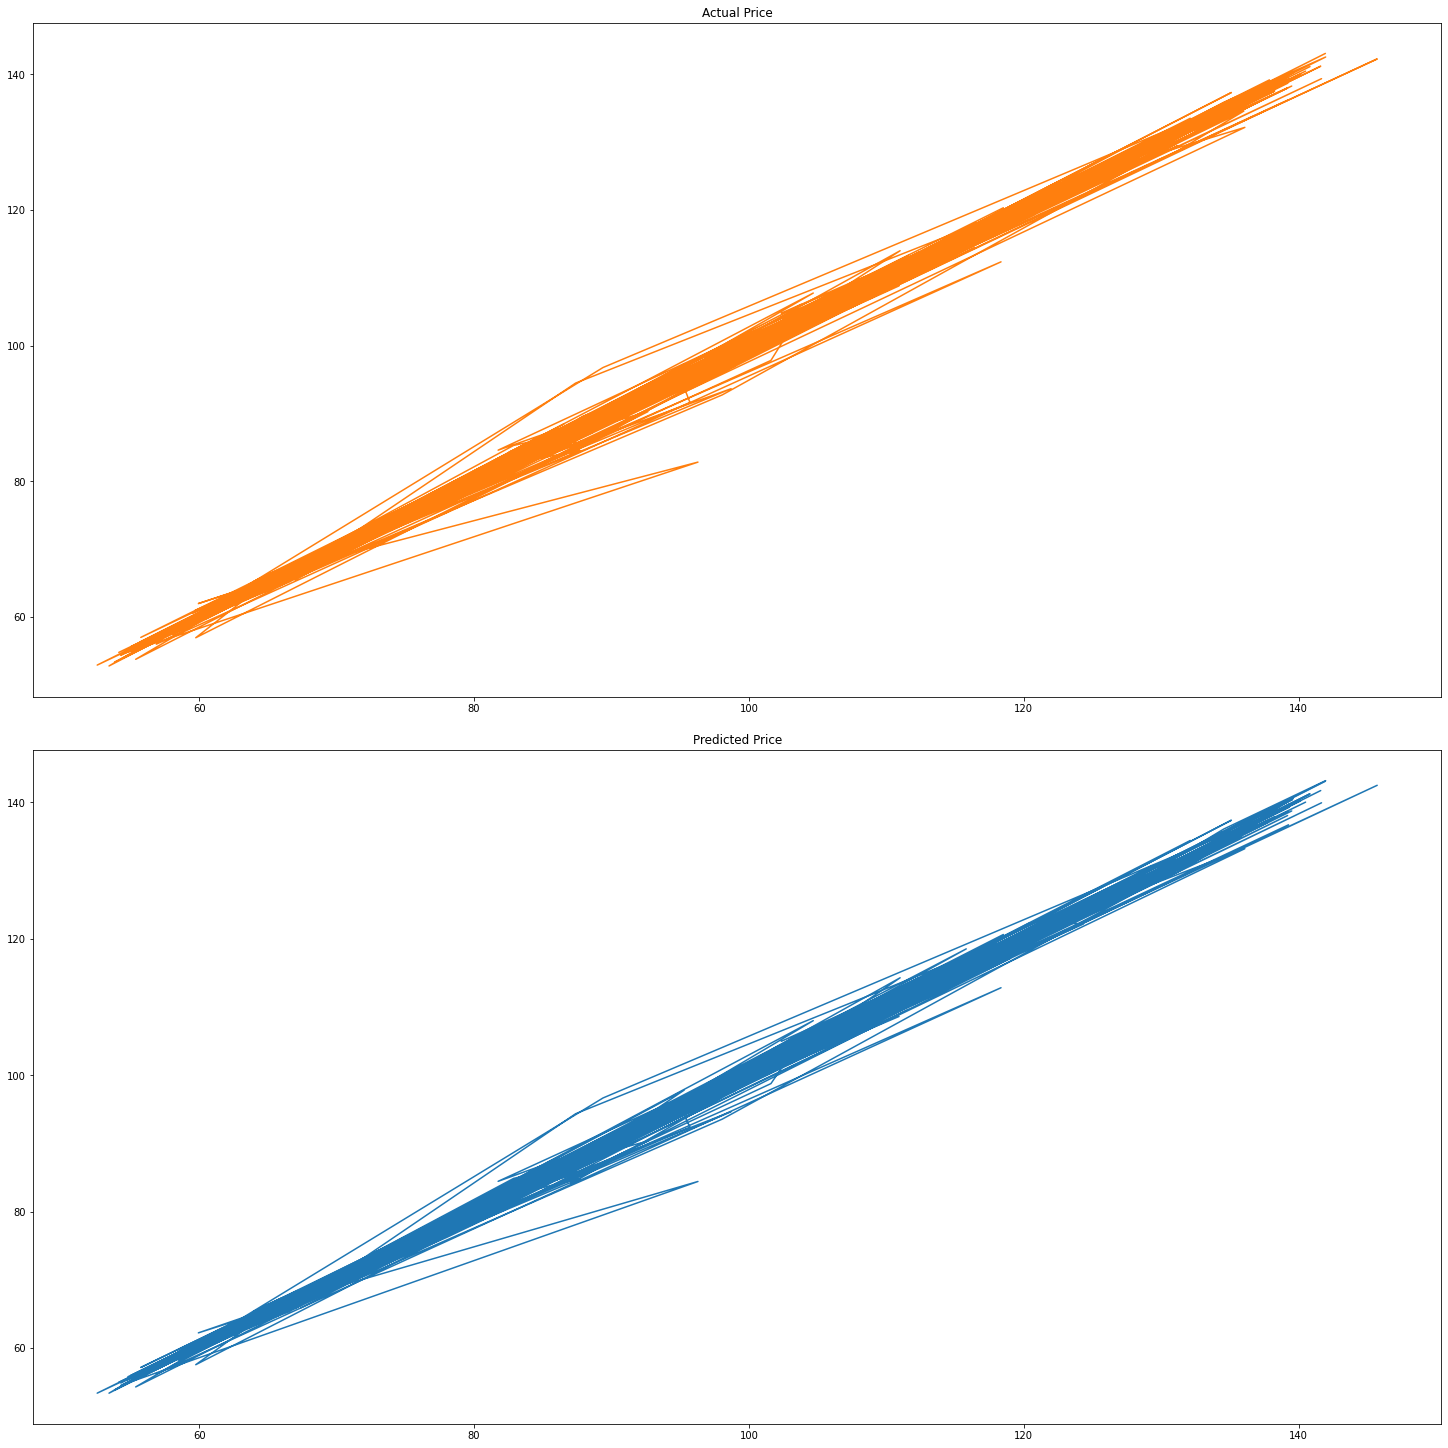

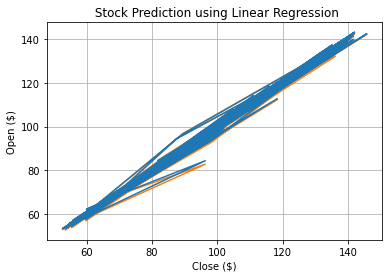

In [ ]:
#Allegion Plc Group Price Prediction
data_X_IN_3 = mean_df_ALLE.loc[:,mean_df_ALLE.columns !=  'Close' ]
data_Y_IN_3 = mean_df_ALLE['Close']
train_test(data_X_IN_3,data_Y_IN_3)

###Evaluation
We have evaluated the performance of our model using Mean Squared Error(MSE). MSE of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.<br>

Our model generates a **MSE of 0.01 and Prediction Score of 0.99**


###Conclusion
Using DataRobot Paxata we have merged the S&P 500 health care index datasets, IT industry dataset, and industrial dataset along with covid_19 dataset based on date. <br>We have used linear regression as our prediction model and mean square error as our evaluation model. The basic idea of our evaluation model is to measure how bad/erroneous the model's predictions are when compared to actual observed values.<br>Our prediction model has an accuracy of 0.99 and the mean square error is 0.011.<br><br>
We had faced a problem with finding a model suitable to our prediction requirements. As per our understanding, algorithms like ARIMA, Facebook Prophet accepted only one attribute/feature, whereas we had five different features in our cleaned data. <br>We then found and implemented the Multiple Linear Regression model.

###Future Scope
With further calculations, we may also be able to predict the values of sector indices in the S&P 500 market. With a similar approach, we can predict the impact of covid-19 on different sectors(Other than health, IT, and industries)
